In [1]:
import uproot
import numpy as np

import matplotlib.pyplot as plt

In [2]:
cols = ['#CCCCCC', '#07A9FF', '#1A2A5B', '#FF9E21', '#149A9A', 'indianred', '#66283A', '#8A1859', '#BFC2C7',
        '#FFB0A8', '#B580CA', '#203769', '#909090', '#909090', '#83C369', '#FDED95', '#85F7C2', '#105D20',
        '#E77D4D', '#9D0008', '#EDDAB7', '#DCDCDC', '#DCDCDC', '#393939']

## SM 2nbb distribution

In [3]:
sm_2nbb_dist = np.loadtxt('/Users/romoluque_c/LEGEND/2nbb_distortions/Spectral_Effects_Fitting_Lars/L200_Spectral_Effects_Fitting/dist/standard_model/SM_2vbb_76Ge_sums.txt', usecols=(2), unpack=True)
sm_2nbb_dist = np.insert(sm_2nbb_dist, 0, 0, axis=0)

In [4]:
bins = np.arange(0, len(sm_2nbb_dist), 1)

In [5]:
len(sm_2nbb_dist), len(bins)

(2040, 2040)

## Majoron emission

In [6]:
data_path = '/Users/romoluque_c/LEGEND/2nbb_distortions/data_bckg_model/'

majoRL_dist0 = np.loadtxt(data_path + '/majorons/TotalEnergyDist_RL_76Ge.txt', usecols=(1), unpack=True)
majoRR_dist0 = np.loadtxt(data_path + '/majorons/TotalEnergyDist_RR_76Ge.txt', usecols=(1), unpack=True)

majoRL_dist0 = np.insert(majoRL_dist0, 0, 0, axis=0)
majoRR_dist0 = np.insert(majoRR_dist0, 0, 0, axis=0)

majoRL_dist = majoRL_dist0 / np.sum(majoRL_dist0)
majoRR_dist = majoRR_dist0 / np.sum(majoRR_dist0)

In [7]:
def distribution_exotic_2nbb(x, n):
    ## x input must be given in keV
    Qbb = 2039
    me  =  511
    x0  = Qbb / me
    x   =   x / me
    y   = (pow(x,4) + 10*pow(x,3) + 40*pow(x,2) + 60*x + 30) * x * pow((x0-x), n)
    y   = y / np.sum(y) # Normalize to area = 1
    return y

majo_n1_dist = distribution_exotic_2nbb(bins, 1)
majo_n2_dist = distribution_exotic_2nbb(bins, 2)
majo_n3_dist = distribution_exotic_2nbb(bins, 3)
majo_n7_dist = distribution_exotic_2nbb(bins, 7)

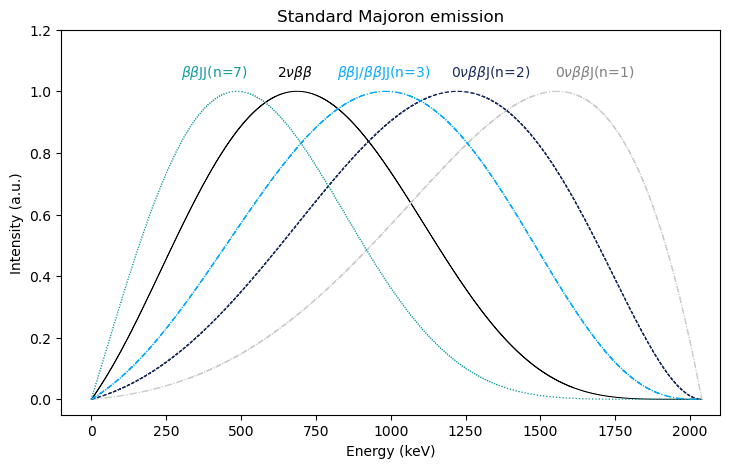

In [8]:
# fig, ax = plt.subplots(figsize=(8.5, 4))
# ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k'    , lw=0.7, ls='-',  label=r'SM 2$\nu\beta\beta$')
# ax.step(bins, majo_n1_dist/np.max(majo_n1_dist), c=cols[0], lw=0.9, ls='-.', label=r'$\beta\beta$J (n=1)')
# ax.step(bins, majo_n2_dist/np.max(majo_n2_dist), c=cols[2], lw=0.9, ls='--', label=r'$\beta\beta$J (n=2)')
# ax.step(bins, majo_n3_dist/np.max(majo_n3_dist), c=cols[1], lw=0.9, ls='-.', label=r'$\beta\beta$J/$\beta\beta$JJ (n=3)')
# ax.step(bins, majo_n7_dist/np.max(majo_n7_dist), c=cols[4], lw=0.9, ls=':',  label=r'$\beta\beta$JJ (n=7)')
# ax.set_xlim(-100, 2600)
# ax.set_xlabel('Energy (keV)')
# ax.set_ylabel('Intensity (a.u.)')
# ax.set_title('Standard Majoron emission')
# ax.grid()
# ax.legend();

fig, ax = plt.subplots(figsize=(8.5, 5))
ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k'    , lw=0.7, ls='-',  label=r'SM 2$\nu\beta\beta$')
ax.step(bins, majo_n1_dist/np.max(majo_n1_dist), c=cols[0], lw=0.9, ls='-.', label=r'$\beta\beta$J (n=1)')
ax.step(bins, majo_n2_dist/np.max(majo_n2_dist), c=cols[2], lw=0.9, ls='--', label=r'$\beta\beta$J (n=2)')
ax.step(bins, majo_n3_dist/np.max(majo_n3_dist), c=cols[1], lw=0.9, ls='-.', label=r'$\beta\beta$J/$\beta\beta$JJ (n=3)')
ax.step(bins, majo_n7_dist/np.max(majo_n7_dist), c=cols[4], lw=0.9, ls=':',  label=r'$\beta\beta$JJ (n=7)')

ax.text( 300, 1.05, r'$\beta\beta$JJ(n=7)',               color=cols[4])
ax.text( 620, 1.05, r'2$\nu\beta\beta$',                  color='k')
ax.text( 820, 1.05, r'$\beta\beta$J/$\beta\beta$JJ(n=3)', color=cols[1])
ax.text(1200, 1.05, r'0$\nu\beta\beta$J(n=2)',            color=cols[2])
ax.text(1550, 1.05, r'0$\nu\beta\beta$J(n=1)',            color='grey')

ax.set_xlim(-100, 2600)
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title('Standard Majoron emission')
ax.set_xlim(-100, 2100)
ax.set_ylim(-0.05, 1.2)
plt.show()

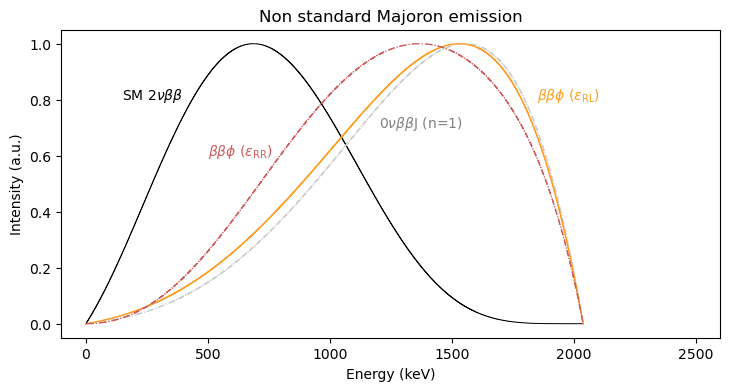

In [9]:
# fig, ax = plt.subplots(figsize=(8.5, 4))
# ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k'    , lw=0.7, ls='-',  label=r'SM 2$\nu\beta\beta$')
# ax.step(bins, majo_n1_dist/np.max(majo_n1_dist), c=cols[0], lw=0.9, ls='-.', label=r'$\beta\beta$J (n=1)')
# ax.step(bins, majoRL_dist /np.max(majoRL_dist ), c=cols[3], lw=0.9, ls='-',  label=r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RL}}$)')
# ax.step(bins, majoRR_dist /np.max(majoRR_dist ), c=cols[5], lw=0.9, ls='-.', label=r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RR}}$)')
# ax.set_xlim(-100, 2600)
# ax.set_xlabel('Energy (keV)')
# ax.set_ylabel('Intensity (a.u.)')
# ax.set_title('Non standard Majoron emission')
# #ax.grid()
# ax.legend();

fig, ax = plt.subplots(figsize=(8.5, 4))
ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k'    , lw=0.7, ls='-',  label=r'SM 2$\nu\beta\beta$')
ax.step(bins, majo_n1_dist/np.max(majo_n1_dist), c=cols[0], lw=0.9, ls='-.', label=r'$\beta\beta$J (n=1)')
ax.step(bins, majoRL_dist /np.max(majoRL_dist ), c=cols[3], lw=0.9, ls='-',  label=r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RL}}$)')
ax.step(bins, majoRR_dist /np.max(majoRR_dist ), c=cols[5], lw=0.9, ls='-.', label=r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RR}}$)')

ax.text(150, 0.8, r'SM 2$\nu\beta\beta$',                          color='k')
ax.text(1850, 0.8, r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RL}}$)', color=cols[3])
ax.text(1200, 0.7, r'0$\nu\beta\beta$J (n=1)',                     color='grey')
ax.text(500, 0.6, r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RR}}$)',  color=cols[5])
ax.set_xlim(-100, 2600)
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title('Non standard Majoron emission')
plt.show()

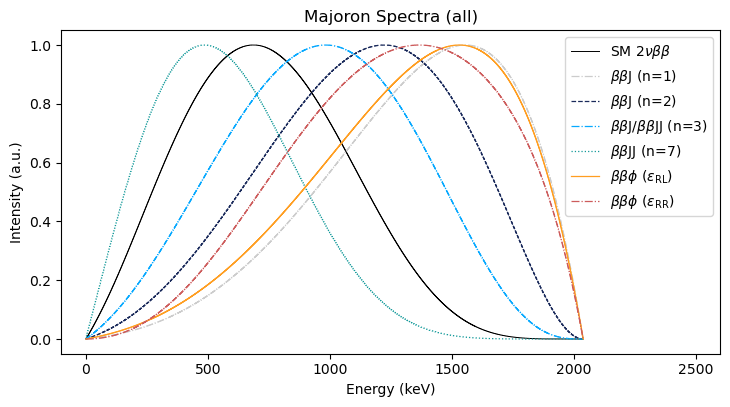

In [10]:
fig, ax = plt.subplots(figsize=(8.5, 4.2))
ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k'    , lw=0.7, ls='-',  label=r'SM 2$\nu\beta\beta$')
ax.step(bins, majo_n1_dist/np.max(majo_n1_dist), c=cols[0], lw=0.9, ls='-.', label=r'$\beta\beta$J (n=1)')
ax.step(bins, majo_n2_dist/np.max(majo_n2_dist), c=cols[2], lw=0.9, ls='--', label=r'$\beta\beta$J (n=2)')
ax.step(bins, majo_n3_dist/np.max(majo_n3_dist), c=cols[1], lw=0.9, ls='-.', label=r'$\beta\beta$J/$\beta\beta$JJ (n=3)')
ax.step(bins, majo_n7_dist/np.max(majo_n7_dist), c=cols[4], lw=0.9, ls=':',  label=r'$\beta\beta$JJ (n=7)')
ax.step(bins, majoRL_dist /np.max(majoRL_dist ), c=cols[3], lw=0.9, ls='-',  label=r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RL}}$)')
ax.step(bins, majoRR_dist /np.max(majoRR_dist ), c=cols[5], lw=0.9, ls='-.', label=r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RR}}$)')
ax.set_xlim(-100, 2600)
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title('Majoron Spectra (all)')
ax.legend();

## Light exotic fermions (sterile right-handed neutrinos)

In [11]:
basepath = '/Users/romoluque_c/LEGEND/2nbb_distortions/Spectral_Effects_Fitting_Lars/spectral_dist/'

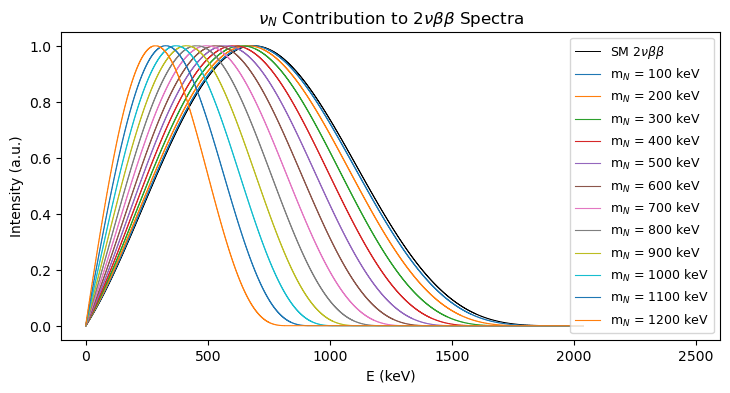

In [12]:
sterile_masses_keV = np.arange(100, 1300, 100)
lef_signal_dist    = []

for idx, sterile_mass_keV in enumerate(sterile_masses_keV):
    sdist = np.loadtxt((basepath + 'dist/sterile/76Ge_2vbb_mnu_{}_0_keV/76Ge_sums.txt'.format(sterile_mass_keV)), usecols=(2))
    sdist = np.insert(sdist, 0, 0, axis=0)
    sdist = sdist / np.sum(sdist)
    lef_signal_dist.append(sdist)

fig, ax = plt.subplots(figsize=(8.5, 4))
ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k', lw=0.7, ls='-', label=r'SM 2$\nu\beta\beta$')

for sdist, sterile_mass_keV in zip(lef_signal_dist, sterile_masses_keV):
    ax.step(bins, sdist/np.max(sdist), label=r'm$_{N}$ = ' + str(sterile_mass_keV) + ' keV', lw=0.8)

ax.set_xlim(-100, 2600)
ax.set_xlabel('E (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title(r'$\nu_N$ Contribution to 2$\nu\beta\beta$ Spectra')
ax.legend(fontsize=9)
plt.show()

## Right Handed Currents Spectra

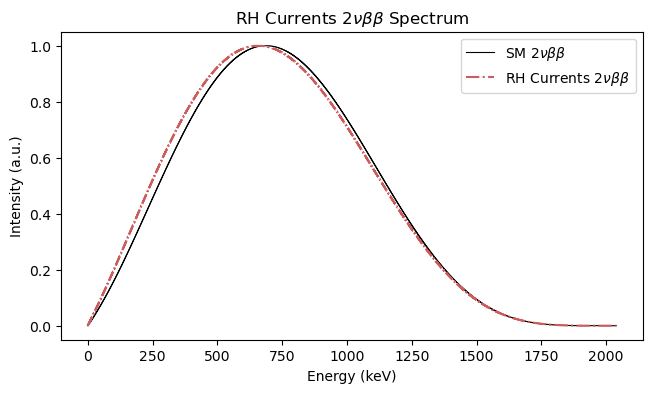

In [13]:
rh_curr_dist = np.loadtxt(basepath+'dist/rh_curr/Ge-RHC-Etot-distro-1kev-reinterpolated.dat', usecols=(1), unpack=True)
rh_curr_dist = np.insert(rh_curr_dist, 0, 0, axis=0)
rh_curr_dist = rh_curr_dist / np.sum(rh_curr_dist)

fig, ax = plt.subplots(figsize=(7.5, 4))
ax.step(bins, sm_2nbb_dist / np.max(sm_2nbb_dist), c='k',     lw=0.8,  label=r'SM 2$\nu\beta\beta$')
ax.step(bins, rh_curr_dist / np.max(rh_curr_dist), c=cols[5], ls='-.', label=r'RH Currents 2$\nu\beta\beta$', )
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title(r'RH Currents 2$\nu\beta\beta$ Spectrum')
ax.legend()
plt.show()

## Lorentz violation spectrum:

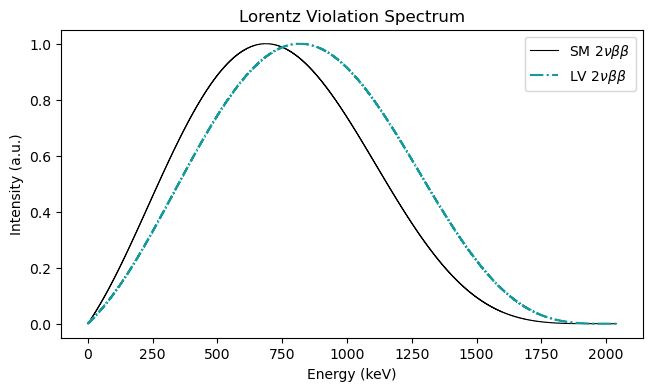

In [14]:
lv_dist = np.loadtxt(basepath + 'dist/lorentz/LV_76Ge_spectra.dat', usecols=(2), unpack=True)
lv_dist = np.insert(lv_dist, 0, 0, axis=0)
lv_dist = lv_dist / np.sum(lv_dist)

fig, ax = plt.subplots(figsize=(7.5, 4))
ax.step(bins, sm_2nbb_dist / np.max(sm_2nbb_dist), c='k',     lw=0.8,  label=r'SM 2$\nu\beta\beta$')
ax.step(bins, lv_dist      / np.max(lv_dist),      c=cols[4], ls='-.', label=r'LV 2$\nu\beta\beta$')
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title('Lorentz Violation Spectrum')
ax.legend()
plt.show()

## Double exotic fermion decay

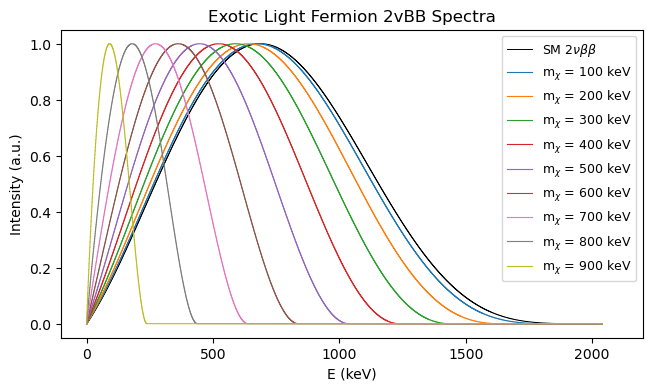

In [15]:
light_fermion_masses_keV = np.arange(100, 1000, 100)
def_signal_dist          = []

for idx, fermion_mass_keV in enumerate(light_fermion_masses_keV):
    sdist = np.loadtxt((basepath + 'dist/double_ferm/76Ge_2vbb_mnu_{}_{}_keV/76Ge_sums.txt'.format(fermion_mass_keV, fermion_mass_keV)), usecols=(2))
    sdist = np.insert(sdist, 0, 0, axis=0)
    sdist = sdist / np.sum(sdist)
    def_signal_dist.append(sdist)
    
fig, ax = plt.subplots(figsize=(7.5, 4))
ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k', lw=0.7, ls='-', label=r'SM 2$\nu\beta\beta$')

for sdist, fermion_mass_keV in zip(def_signal_dist, light_fermion_masses_keV):
    ax.step(bins, sdist/np.max(sdist), label=r'm$_{\chi}$ = ' + str(fermion_mass_keV) + ' keV', lw=0.8)

ax.set_xlim(-100, 2200)
ax.set_xlabel('E (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title('Exotic Light Fermion 2vBB Spectra')
ax.legend(fontsize=9)
plt.show()

## All contributions together:

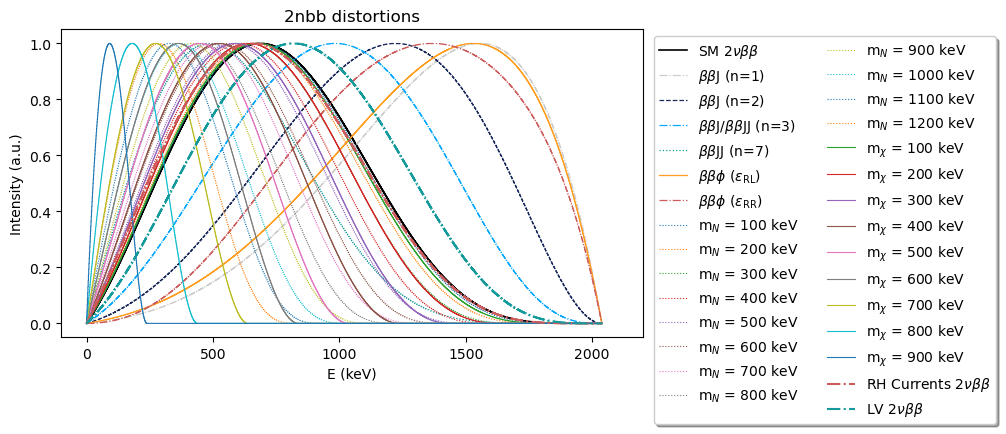

In [16]:
for sdist, sterile_mass_keV in zip(lef_signal_dist, sterile_masses_keV):
    ax.step(bins, sdist/np.max(sdist), label=r'm$_{N}$ = ' + str(sterile_mass_keV) + ' keV', lw=0.8)

    
fig, ax = plt.subplots(figsize=(7.5, 4))
ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k', lw=1.2, ls='-', label=r'SM 2$\nu\beta\beta$')
#ax.fill_between(bins, 0, sm_2nbb_dist/np.max(sm_2nbb_dist), color='teal', alpha=0.2)#, hatch='-')

ax.step(bins, majo_n1_dist/np.max(majo_n1_dist), c=cols[0], lw=0.9, ls='-.', label=r'$\beta\beta$J (n=1)')
ax.step(bins, majo_n2_dist/np.max(majo_n2_dist), c=cols[2], lw=0.9, ls='--', label=r'$\beta\beta$J (n=2)')
ax.step(bins, majo_n3_dist/np.max(majo_n3_dist), c=cols[1], lw=0.9, ls='-.', label=r'$\beta\beta$J/$\beta\beta$JJ (n=3)')
ax.step(bins, majo_n7_dist/np.max(majo_n7_dist), c=cols[4], lw=0.9, ls=':',  label=r'$\beta\beta$JJ (n=7)')
ax.step(bins, majoRL_dist /np.max(majoRL_dist ), c=cols[3], lw=0.9, ls='-',  label=r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RL}}$)')
ax.step(bins, majoRR_dist /np.max(majoRR_dist ), c=cols[5], lw=0.9, ls='-.', label=r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RR}}$)')

for sdist, sterile_mass_keV in zip(lef_signal_dist, sterile_masses_keV):
    ax.step(bins, sdist/np.max(sdist), label=r'm$_{N}$ = ' + str(sterile_mass_keV) + ' keV', lw=0.8, ls=':')
for sdist, fermion_mass_keV in zip(def_signal_dist, light_fermion_masses_keV):
    ax.step(bins, sdist/np.max(sdist), label=r'm$_{\chi}$ = ' + str(fermion_mass_keV) + ' keV', lw=0.8)
    
ax.step(bins, rh_curr_dist / np.max(rh_curr_dist), c=cols[5], ls='-.', label=r'RH Currents 2$\nu\beta\beta$', )
ax.step(bins, lv_dist/np.max(lv_dist), c=cols[4], ls='-.', label=r'LV 2$\nu\beta\beta$')


ax.set_xlim(-100, 2200)
ax.set_xlabel('E (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title('2nbb distortions')
ax.legend(loc='upper right', ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(1.62, 1))

plt.show()

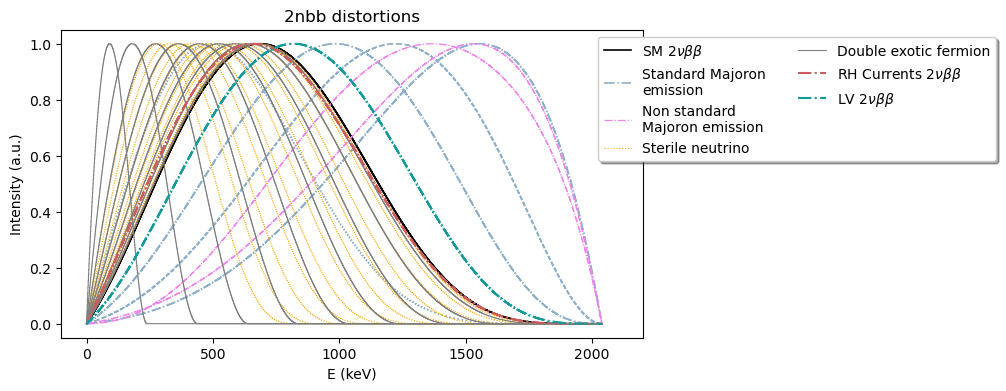

In [17]:
for sdist, sterile_mass_keV in zip(lef_signal_dist, sterile_masses_keV):
    ax.step(bins, sdist/np.max(sdist), label=r'm$_{N}$ = ' + str(sterile_mass_keV) + ' keV', lw=0.8)

    
fig, ax = plt.subplots(figsize=(7.5, 4))
ax.step(bins, sm_2nbb_dist/np.max(sm_2nbb_dist), c='k', lw=1.2, ls='-', label=r'SM 2$\nu\beta\beta$')
#ax.fill_between(bins, 0, sm_2nbb_dist/np.max(sm_2nbb_dist), color='teal', alpha=0.2)#, hatch='-')

ax.step(bins, majo_n1_dist/np.max(majo_n1_dist), c='#8FB0CB', lw=1.2, ls='-.', label='Standard Majoron \nemission')
ax.step(bins, majo_n2_dist/np.max(majo_n2_dist), c='#8FB0CB', lw=1.2, ls='--')
ax.step(bins, majo_n3_dist/np.max(majo_n3_dist), c='#8FB0CB', lw=1.2, ls='-.')
ax.step(bins, majo_n7_dist/np.max(majo_n7_dist), c='#8FB0CB', lw=1.2, ls=':')
ax.step(bins, majoRL_dist /np.max(majoRL_dist ), c='violet',  lw=0.9, ls='-.', label='Non standard \nMajoron emission')
ax.step(bins, majoRR_dist /np.max(majoRR_dist ), c='violet',  lw=0.9, ls='-.')

for i, (sdist, sterile_mass_keV) in enumerate(zip(lef_signal_dist, sterile_masses_keV)):
    if i==0:
        ax.step(bins, sdist/np.max(sdist), label='Sterile neutrino', lw=0.8, ls=':', c='orange')
    else:
        ax.step(bins, sdist/np.max(sdist), lw=0.8, ls=':', c='orange')
for i, (sdist, fermion_mass_keV) in enumerate(zip(def_signal_dist, light_fermion_masses_keV)):
    if i==0:
        ax.step(bins, sdist/np.max(sdist), label='Double exotic fermion', lw=0.8, color='grey')
    else:
        ax.step(bins, sdist/np.max(sdist), lw=0.8, color='grey')
    
ax.step(bins, rh_curr_dist / np.max(rh_curr_dist), c=cols[5], ls='-.', label=r'RH Currents 2$\nu\beta\beta$')
ax.step(bins, lv_dist/np.max(lv_dist), c=cols[4], ls='-.', label=r'LV 2$\nu\beta\beta$')


ax.set_xlim(-100, 2200)
ax.set_xlabel('E (keV)')
ax.set_ylabel('Intensity (a.u.)')
ax.set_title('2nbb distortions')
ax.legend(loc='upper right', ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(1.62, 1))

plt.show()

# Sensitivity:

### L200 background data

In [18]:
data_path = '/Users/romoluque_c/LEGEND/2nbb_distortions/data_bckg_model/'

bckg_bins, tot_model = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_total_model.txt', usecols=(0,1), unpack=True, skiprows=1, delimiter=',')
alphas_model         = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_alphas.txt',      usecols=(1),   unpack=True, skiprows=1, delimiter=',')
co60_model           = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_Co60_chain.txt',  usecols=(1),   unpack=True, skiprows=1, delimiter=',')
k40_model            = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_K40_chain.txt',   usecols=(1),   unpack=True, skiprows=1, delimiter=',')
k42_model            = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_K42_chain.txt',   usecols=(1),   unpack=True, skiprows=1, delimiter=',')
vvBB_model           = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_Nvbb.txt',        usecols=(1),   unpack=True, skiprows=1, delimiter=',')
Th_model             = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_Th_chain.txt',    usecols=(1),   unpack=True, skiprows=1, delimiter=',')
U_model              = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_U_chain.txt',     usecols=(1),   unpack=True, skiprows=1, delimiter=',')
L200_actual_data     = np.loadtxt(data_path + 'l200_p03_to_p09_icpc_fitted_data.txt', usecols=(1),   unpack=True, skiprows=1, delimiter=',')

# From Neutrino2024 talk
L200_data_exposure = 76.2 #kg * yr

######## Normalize by exposure
total_model      = tot_model        / L200_data_exposure
alphas_model     = alphas_model     / L200_data_exposure
co60_model       = co60_model       / L200_data_exposure
k40_model        = k40_model        / L200_data_exposure
k42_model        = k42_model        / L200_data_exposure
vvBB_model       = vvBB_model       / L200_data_exposure
Th_model         = Th_model         / L200_data_exposure
U_model          = U_model          / L200_data_exposure
L200_actual_data = L200_actual_data / L200_data_exposure

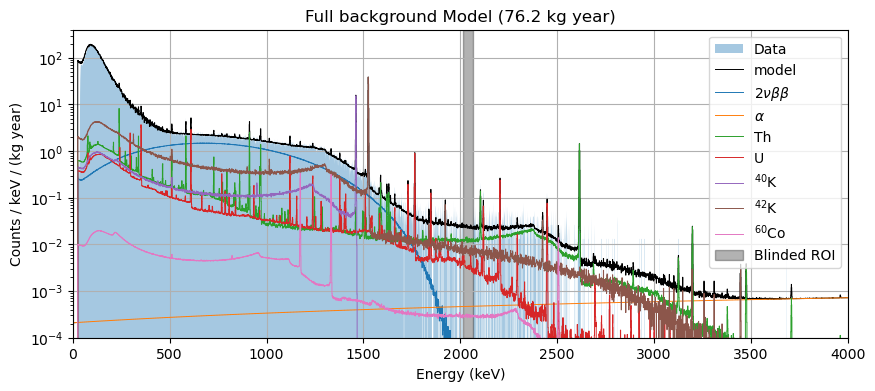

In [19]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.fill_between(bckg_bins, 0, L200_actual_data, label=r'Data', alpha=0.4)
#ax.step(bckg_bins, L200_actual_data, label=r'Data', alpha=0.3)
ax.step(bckg_bins, total_model,  where='post', lw=0.7, label='model', color='black')
ax.step(bckg_bins, vvBB_model,   where='post', lw=0.7, label=r'$2\nu\beta\beta$')
ax.step(bckg_bins, alphas_model, where='post', lw=0.7, label=r'$\alpha$')
ax.step(bckg_bins, Th_model,     where='post', lw=0.7, label=r'Th')
ax.step(bckg_bins, U_model,      where='post', lw=0.7, label=r'U')
ax.step(bckg_bins, k40_model,    where='post', lw=0.7, label=r'$^{40}$K')
ax.step(bckg_bins, k42_model,    where='post', lw=0.7, label=r'$^{42}$K')
ax.step(bckg_bins, co60_model,   where='post', lw=0.7, label=r'$^{60}$Co')

# Shade blinded ROI
qbb      = 2039 # keV
roi_ampl =   50 # keV
ax.axvspan(qbb - roi_ampl/2, qbb + roi_ampl/2, label=r'Blinded ROI', alpha=0.3, color='black')
ax.legend(loc='upper right')
ax.set_yscale('log')
ax.set_title(f'Full background Model ({L200_data_exposure} kg year)')
ax.set_ylabel('Counts / keV / (kg year)')
ax.set_xlabel('Energy (keV)')
ax.set_ylim(1e-4, 4e2)
ax.set_xlim(0, 4000)
ax.grid()
plt.show()

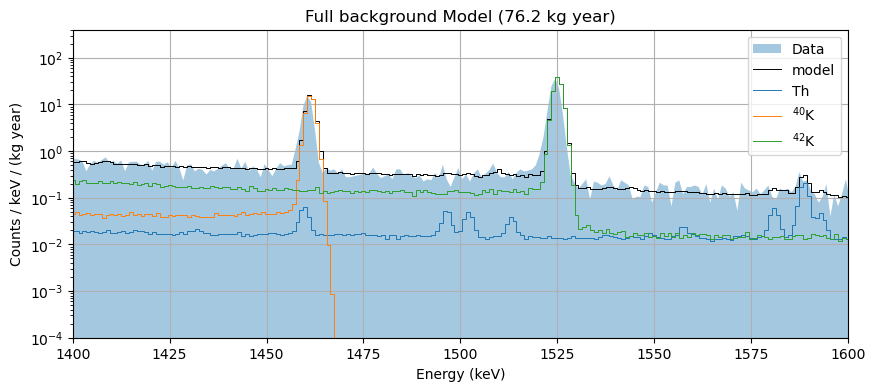

In [65]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.fill_between(bckg_bins, 0, L200_actual_data, label=r'Data', alpha=0.4)
#ax.step(bckg_bins, L200_actual_data, label=r'Data', alpha=0.3)
ax.step(bckg_bins, total_model,  where='post', lw=0.7, label='model', color='black')
ax.step(bckg_bins, Th_model,     where='post', lw=0.7, label=r'Th')
#ax.step(bckg_bins, U_model,      where='post', lw=0.7, label=r'U')
ax.step(bckg_bins, k40_model,    where='post', lw=0.7, label=r'$^{40}$K')
ax.step(bckg_bins, k42_model,    where='post', lw=0.7, label=r'$^{42}$K')
#ax.step(bckg_bins, co60_model,   where='post', lw=0.7, label=r'$^{60}$Co')
ax.legend(loc='upper right')
ax.set_yscale('log')
ax.set_title(f'Full background Model ({L200_data_exposure} kg year)')
ax.set_ylabel('Counts / keV / (kg year)')
ax.set_xlabel('Energy (keV)')
ax.set_ylim(1e-4, 4e2)
ax.set_xlim(1400, 1600)
ax.grid()
plt.show()

## Spectrum subtracting 2nbb:

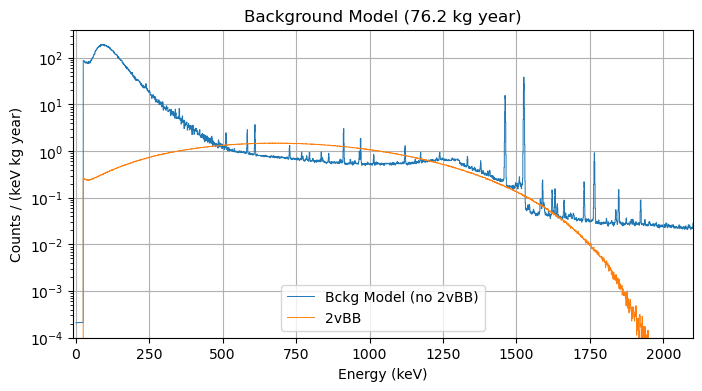

In [20]:
bckg_model = (total_model - vvBB_model)

fig, ax = plt.subplots(figsize=(8, 4))
ax.step(bckg_bins, bckg_model, where='post', lw=0.7, label='Bckg Model (no 2vBB)')
ax.step(bckg_bins, vvBB_model, where='post', lw=0.7, label='2vBB')
ax.set_yscale('log')
ax.set_ylim(1e-4, 4e2)
ax.set_title(f'Background Model ({L200_data_exposure} kg year)')
ax.set_ylabel("Counts / (keV kg year)")
ax.set_xlabel('Energy (keV)')
ax.set_xlim(-10, 2100)
ax.grid()
ax.legend()
plt.show()

## Majoron emission:

In [21]:
import zfit
import math
import scipy
import matplotlib

from hepstats.hypotests.calculators import AsymptoticCalculator
from hepstats.hypotests.parameters  import POIarray, POI

/Users/romoluque_c/anaconda3/lib/python3.10/site-packages/zfit/__init__.py:59: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(
/Users/romoluque_c/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
def find_zero_crossing(x,y):
    """
    Documentation
    """
    tck = scipy.interpolate.splrep(x,y,s=0)
    return scipy.interpolate.sproot(tck)

def sci_notation(num, decimal_digits=1, precision=None, exponent=None):
    """
    Returns a string representation of the scientific
    notation of the given number formatted for use with
    LaTeX or Mathtext, with specified number of significant
    decimal digits and precision (number of decimal digits
    to show). The exponent to be used can also be specified
    explicitly.
    """
    if exponent is None:
        exponent = int(math.floor(math.log10(abs(num))))
    coeff = round(num / float(10 ** exponent), decimal_digits)
    if precision is None:
        precision = decimal_digits

    return r"{0:.{2}f}$\cdot$10$^{{{1:d}}}$".format(coeff, exponent, precision)

def set_border_line_width(ax: matplotlib.axes, lineWidth: float) -> None:
    """
    Utility function for getting the frame of an axis and setting the line width
    """
    [axis.set_linewidth(lineWidth) for axis in ax.spines.values()]

In [23]:
# Significance Level
alpha = 0.1

# Fit range left endpoints min and max inclusive [min, max]
min_bin = 0
max_bin = 2039

# L200_data_exposure = 76.2 kg yr
exposure = L200_data_exposure

NA             = 6.022141e23 # Avogadro's constant: atoms / mol
mA             = 75.9214027e-3 # kg / mol of 76Ge
half_life_76Ge = 2.022e21 # yr (From GERDA, 2308.09795)

# Efficiency. explain?
eff = 0.75

# Input to fitting loop
labels       = ['n=1','n=2','n=3','n=7','non-standard-RR','non-standard-RL']
labels_fancy = [r'$\beta\beta$J (n=1)', r'$\beta\beta$J (n=2)', r'$\beta\beta$J/$\beta\beta$JJ (n=3)',
                r'$\beta\beta$JJ (n=7)', r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RR}}$)',
                r'$\beta\beta\phi$ ($\epsilon_{\mathrm{RL}}$)']
signal_dists = [majo_n1_dist, majo_n2_dist, majo_n3_dist, majo_n7_dist, majoRR_dist, majoRL_dist]
#n_max_list   = [500, 3000, 5000, 5000, 2000, 2000] # Lars values
n_max_list   = [1000, 2500, 4500, 8500, 3000, 1500] # Max signal counts to scan 

# ===========================================================================

# Cut the distribution in the fit range
limits                  = (min_bin, max_bin+1)
binning                 = max_bin + 1 - min_bin
#bin_left_edges_fitrange = bins      [min_bin:max_bin + 1]
bckg_model_fitrange     = bckg_model[min_bin:max_bin + 1]
vvBB_model_fitrange     = vvBB_model[min_bin:max_bin + 1]

# Calculate the number of bckg and 2vBB events
Nbckg = exposure * np.sum(bckg_model_fitrange)
NvvBB = exposure * np.sum(vvBB_model_fitrange)

# Setup zfit values
obs      = zfit.Space('E', limits=limits, binning=binning)
n_signal = zfit.Parameter('n_signal',     0, 0, step_size=0.01)
n_bckg   = zfit.Parameter('n_bckg',   Nbckg, 0, step_size=0.01)
n_vvBB   = zfit.Parameter('n_2vBB',   NvvBB, 0, step_size=0.01)

# Pdfs
bckg_model_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=bckg_model_fitrange), extended=n_bckg)
vvBB_pdf       = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=vvBB_model_fitrange), extended=n_vvBB)

# For storing data for later
all_half_life_sens = np.zeros(len(signal_dists))

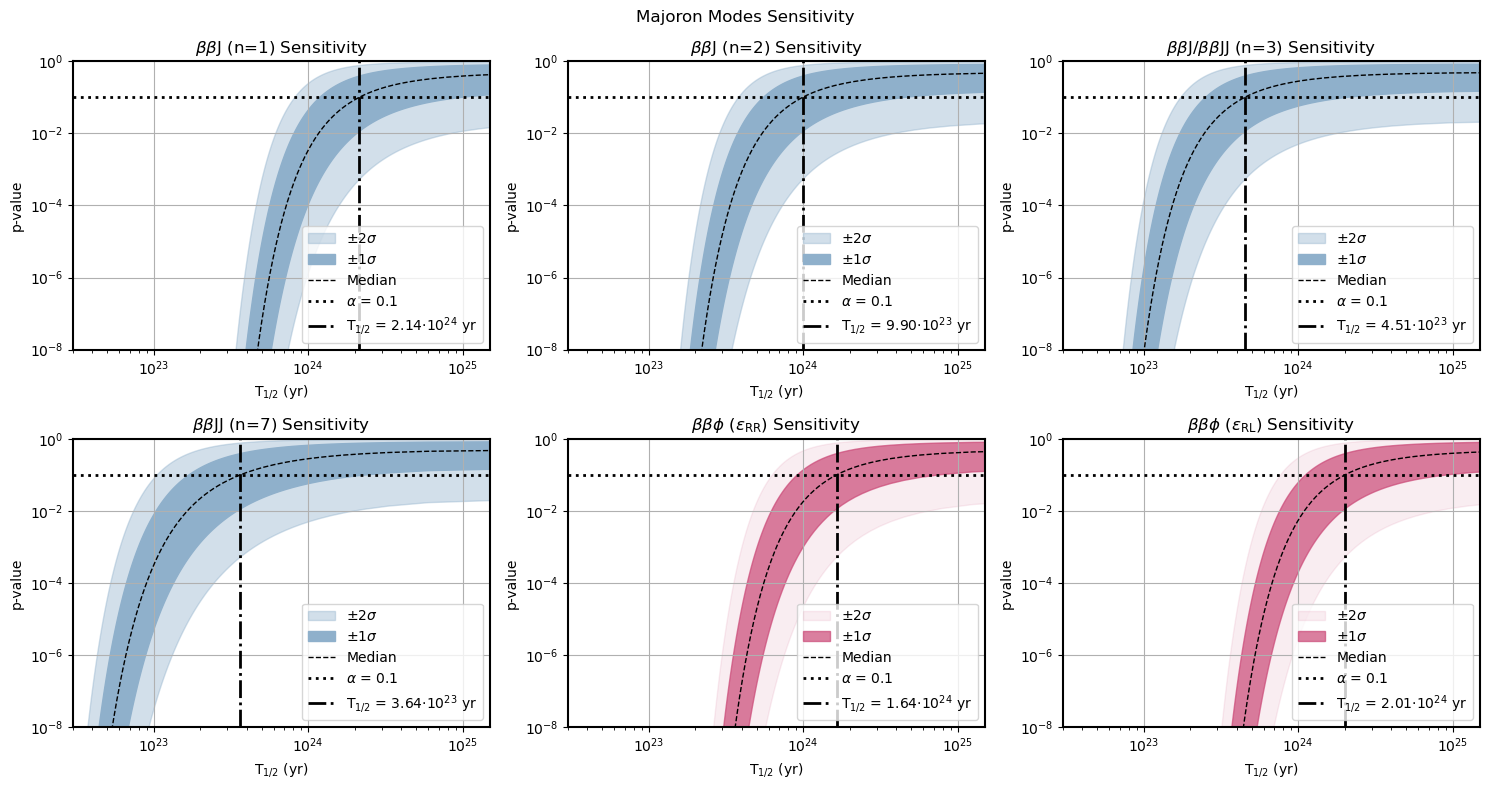

In [24]:
# Prepare combined graph
n_rows      = 2
n_columns   = len(signal_dists) // n_rows
combined_fig, combined_ax = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(15, 8))
combined_ax = combined_ax.flatten()

combined_fig.suptitle('Majoron Modes Sensitivity')

for idx, (lab, lab_fancy, sig_dist, n_max) in enumerate(zip(labels, labels_fancy, signal_dists, n_max_list)):
    sig_dist_fitrange    = sig_dist[min_bin:max_bin + 1]
    majoron_fitrange_eff = np.sum(sig_dist_fitrange) # sig_dist already normalized to 1
    signal_pdf           = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)
    
    # Model (signal + bckg)
    # Since both signal_pdf and bckg_model_pdf are extended PDF's we should not specify the fraction of each PDF
    model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

    n_signal.set_value(0)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))

    # In theory the 'subtr_const': True should offset the loss function closer to 0. In practice the opposite is true.
    # After perusing the source code (https://zfit.readthedocs.io/en/v0.18.1/_modules/zfit/core/loss.html)
    # I see zfit is calculating `log_offset = (NLL - 10000) / nEventsTot` which is completely bogus for a binned fit
    # zfit should be using `log_offset = NLL / binning` because binning is the amount of bins we are actually fitting
    # In fact the loss function L is defined (https://zfit.readthedocs.io/en/stable/user_api/_generated/loss/zfit.loss.ExtendedBinnedNLL.html#extendedbinnednll)
    # as a product over the bins, so NLL will be O(binning) and not O(nEventsTot). So the calculated log_offset is bogus - Lars, June 24, 2024
    # nll = zfit.loss.ExtendedBinnedNLL(model, zfit.data.BinnedData.from_tensor(space=obs, values=model.counts()), options = {'subtr_const' : False})
    nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options={'subtr_const': False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    # Perturb n_signal away from 0 to get out of a local minimum at 0
    # Even when n_signal for the real_data != 0 the fitting gets stuck there for some reason
    # This only happens sometimes, and more often when I don't bound n_signal, n_bckg > 0
    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name='hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

    # https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
    #n_signal_hypot_vals = np.linspace(n_max / 20., n_max, 200)
    n_signal_hypot_vals = np.linspace(10., n_max, 200)
    
    poialt   = POI(n_signal, 0) # Background only
    poinull  = POIarray(n_signal, n_signal_hypot_vals) # Background + signal
    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2], onesided=True)

    full_spec_cts      = n_signal_hypot_vals / majoron_fitrange_eff
    real_full_spec_cts = full_spec_cts / eff
    half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
    inv_half_life      = 1 / half_life
    
    if idx < 4:
        col = '#8FB0CB'
        alp = 1
    else:
        col = '#CB4977'
        alp = 0.7
    # Calculate sensitivity
    try:
        n_signal_sens           = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)[0]
        n_signal_full_spec_sens = n_signal_sens / majoron_fitrange_eff
        real_full_spec_sens     = n_signal_full_spec_sens / eff
        half_life_sens          = (NA / mA) * (math.log(2) / real_full_spec_sens) * exposure
        inv_half_life_sens      = 1 / half_life_sens
        all_half_life_sens[idx] = half_life_sens
        
        # Plot result on both individual and combined plots
        fig, ax = plt.subplots()
        ax_to_plot = [ax, combined_ax[idx]]
        for ax in ax_to_plot:
            ax.fill_between(half_life, expected[3], expected[4], color=col,    label=r'$\pm 2\sigma$', alpha=alp-0.6)
            ax.fill_between(half_life, expected[1], expected[2], color=col,    label=r'$\pm 1\sigma$', alpha=alp)
            ax.plot(half_life, expected[0], lw=1, ls='dashed',  c='black',     label='Median')
            ax.axhline(alpha,               lw=2, ls='dotted',  color='black', label=r'$\alpha$ = ' + str(alpha))
            ax.axvline(half_life_sens,      lw=2, ls='dashdot', color='black', label='T$_{1/2}$ = ' + sci_notation(half_life_sens, precision=2, decimal_digits=2) + ' yr')
            ax.grid()
            ax.legend(loc='lower right')
            set_border_line_width(ax, 1.5)
            ax.set_xlabel(r'T$_{1/2}$ (yr)')
            ax.set_ylabel('p-value')
            #ax.set_xlim(min(half_life), max(half_life))
            ax.set_xlim(3e22, 1.5e25)
            ax.set_ylim(1e-8, 1)
            ax.set_xscale('log')
            ax.set_yscale('log')
            ax.set_title(lab_fancy + ' Sensitivity')
        fig.savefig('./images/majoron_' + lab + '.pdf', bbox_inches='tight')
        plt.close(fig)
    except IndexError:
        print(f'There are no zero crossings for {lab_fancy}')
        continue
        break

combined_fig.tight_layout()
combined_fig.savefig('./images/majoron_combined.pdf', bbox_inches='tight')
plt.show()

Using background model: 


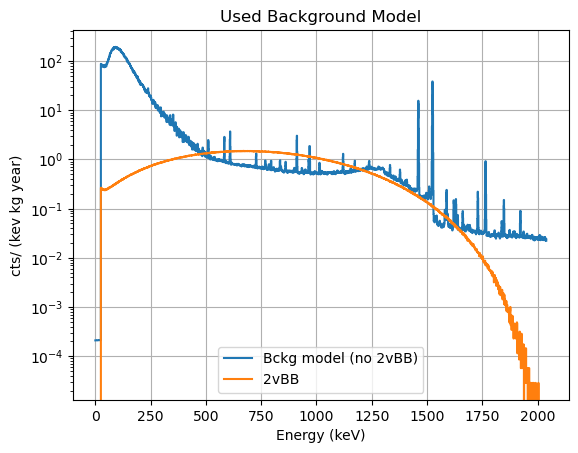

In [25]:
print('Using background model: ')
fig, ax = plt.subplots()
ax.step(bins, bckg_model[:len(bins)], where='post', label='Bckg model (no 2vBB)')
ax.step(bins, vvBB_model[:len(bins)], where='post', label='2vBB')
ax.set_title('Used Background Model')
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('cts/ (kev kg year)')
ax.grid()
ax.set_yscale('log')
ax.legend()
plt.show()

In [26]:
# Nuclear Matrix Elements
gA2           = math.pow(1.2724,2)
M_0n_1        = 2.66 
M_0n_2        = 6.04 
NME_n3_single = 0.381
NME_n3_double = 0.0026
NME_n7        = 0.0026

# Phase space factors
ps_n1_single = 44.2e-18
ps_n3_single = 0.073e-18
ps_n3_double = 0.22e-18
ps_n7_double = 0.420e-18

import warnings

def risky_function():
    warnings.warn("This is a RuntimeWarning", RuntimeWarning)

def coupling(half_life_value, nuclear_matrix_elements, phase_space, m):
    # m=1 for single emission, m=2 for double emission
    temp = 1. / (half_life_value * pow(gA2, 2) * phase_space * pow(nuclear_matrix_elements, 2))
    return pow(temp, 1 / (2 * m))

convRR = 3.65e21 # yr
convRL = 1.91e17 # yr
def nonstandard_coupling(conv, half_life_value):
    return pow(conv / half_life_value, 1 / 2)

for lab, lab_fancy, half_life_sens in zip(labels, labels_fancy, all_half_life_sens):
    g = 0
    
    try:
        with warnings.catch_warnings():
            warnings.simplefilter("error", RuntimeWarning)
            risky_function()
            
        if lab == 'n=1':
            print('Eyyy', coupling(half_life_sens, M_0n_2, ps_n1_single, 1))
            g = [coupling(half_life_sens, M_0n_2, ps_n1_single, 1), coupling(half_life_sens, M_0n_1, ps_n1_single, 1)]
        elif lab =='n=3':
            g = [coupling(half_life_sens, NME_n3_single, ps_n3_single, 1), coupling(half_life_sens, NME_n3_double, ps_n3_double, 2)]
        elif lab =='n=7':
            g = coupling(half_life_sens, NME_n7, ps_n7_double, 2)
        elif lab =='non-standard-RR':
            g = nonstandard_coupling(convRR, half_life_sens)
        elif lab =='non-standard-RL':
            g = nonstandard_coupling(convRL, half_life_sens)

    except RuntimeWarning as e:
        print(f"Caught a RuntimeWarning: {e}")
        continue

    
    print(('Model = {}, inverse of the half-life = {}, half-life = {} yr, Coupling = {}'.format(lab_fancy, 1 / half_life_sens, half_life_sens, g)))
    

Caught a RuntimeWarning: This is a RuntimeWarning
Caught a RuntimeWarning: This is a RuntimeWarning
Caught a RuntimeWarning: This is a RuntimeWarning
Caught a RuntimeWarning: This is a RuntimeWarning
Caught a RuntimeWarning: This is a RuntimeWarning
Caught a RuntimeWarning: This is a RuntimeWarning


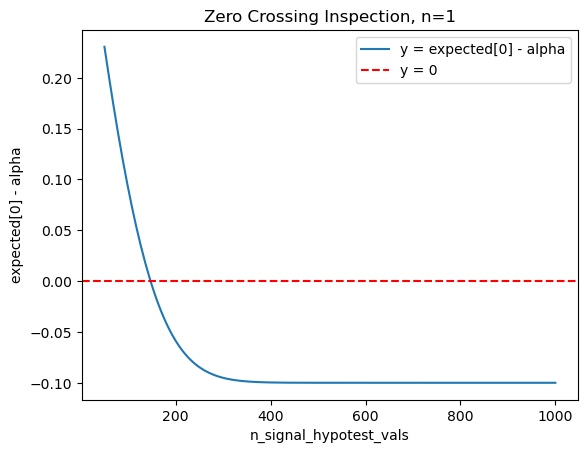

Zero Crossings: [147.13327629]


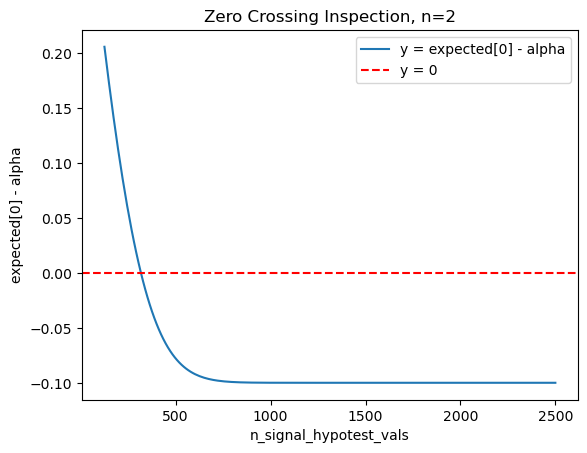

Zero Crossings: [317.38794969]


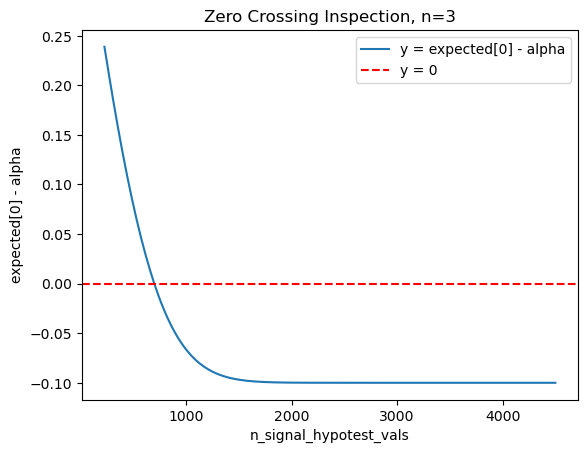

Zero Crossings: [697.48409058]


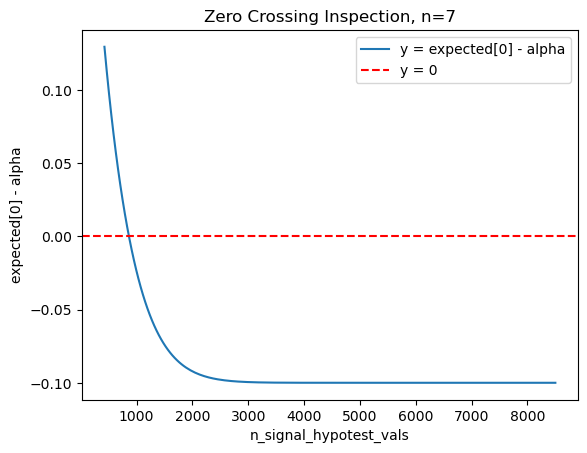

Zero Crossings: [864.21244907]


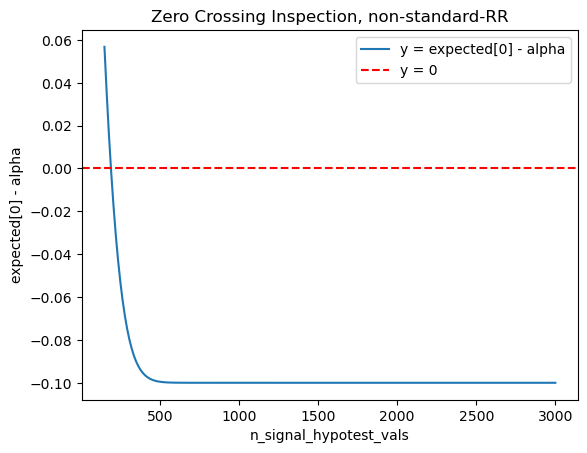

Zero Crossings: [191.15720994]


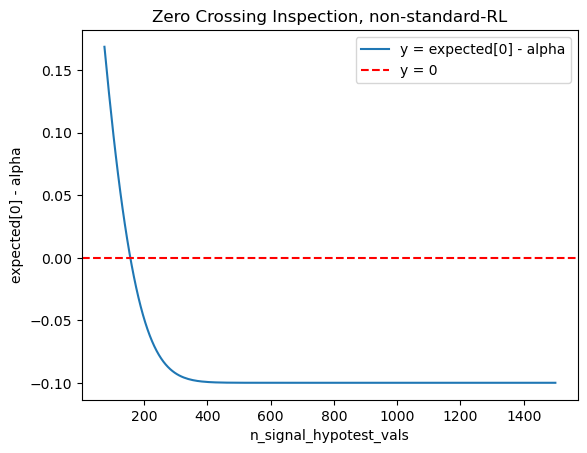

Zero Crossings: [156.71452026]


In [27]:
def find_zero_crossing(x, y):
    """
    Find the zero crossings of the spline interpolated function of y with respect to x.
    """
    tck = scipy.interpolate.splrep(x, y, s=0)
    return scipy.interpolate.sproot(tck)


for idx, (lab, lab_fancy, sig_dist, n_max) in enumerate(zip(labels, labels_fancy, signal_dists, n_max_list)):
    sig_dist_fitrange    = sig_dist[min_bin:max_bin + 1]
    majoron_fitrange_eff = np.sum(sig_dist_fitrange) # sig_dist already normalized to 1
    signal_pdf           = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)
    
    model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

    n_signal.set_value(0)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    real_data = zfit.data    .BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))
    nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name='hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

    n_signal_hypotest_vals = np.linspace(n_max / 20., n_max, 200)
    
    poialt   = POI(n_signal, 0) # Background only
    poinull  = POIarray(n_signal, n_signal_hypotest_vals) # Background + signal
    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2], onesided=True)
    

    plt.plot(n_signal_hypotest_vals, expected[0] - alpha, label='y = expected[0] - alpha')
    plt.axhline(0, color='red', linestyle='--', label='y = 0')
    plt.xlabel('n_signal_hypotest_vals')
    plt.ylabel('expected[0] - alpha')
    plt.title(f'Zero Crossing Inspection, {lab}')
    plt.legend()
    plt.show()
    
    zero_crossings = find_zero_crossing(n_signal_hypotest_vals, expected[0] - alpha)
    print("Zero Crossings:", zero_crossings)

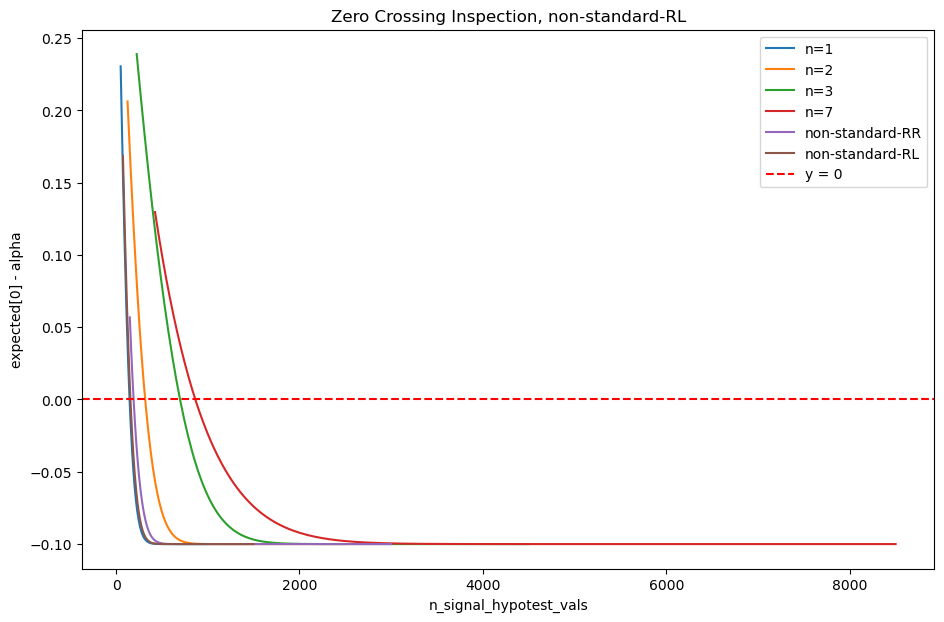

In [28]:
fig = plt.figure(figsize=(11, 7))
for idx, (lab, lab_fancy, sig_dist, n_max) in enumerate(zip(labels, labels_fancy, signal_dists, n_max_list)):
    sig_dist_fitrange    = sig_dist[min_bin:max_bin + 1]
    majoron_fitrange_eff = np.sum(sig_dist_fitrange) # sig_dist already normalized to 1
    signal_pdf           = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)
    
    model     = zfit.pdf     .BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])
    real_data = zfit.data    .BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))
    nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name='hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

    n_signal_hypotest_vals = np.linspace(n_max / 20., n_max, 200)
    
    poialt   = POI(n_signal, 0) # Background only
    poinull  = POIarray(n_signal, n_signal_hypotest_vals) # Background + signal
    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2], onesided=True)
    

    plt.plot(n_signal_hypotest_vals, expected[0] - alpha, label=f'{lab}')
plt.axhline(0, color='red', linestyle='--', label='y = 0')
plt.xlabel('n_signal_hypotest_vals')
plt.ylabel('expected[0] - alpha')
plt.title(f'Zero Crossing Inspection, {lab}')
plt.legend()
plt.show()

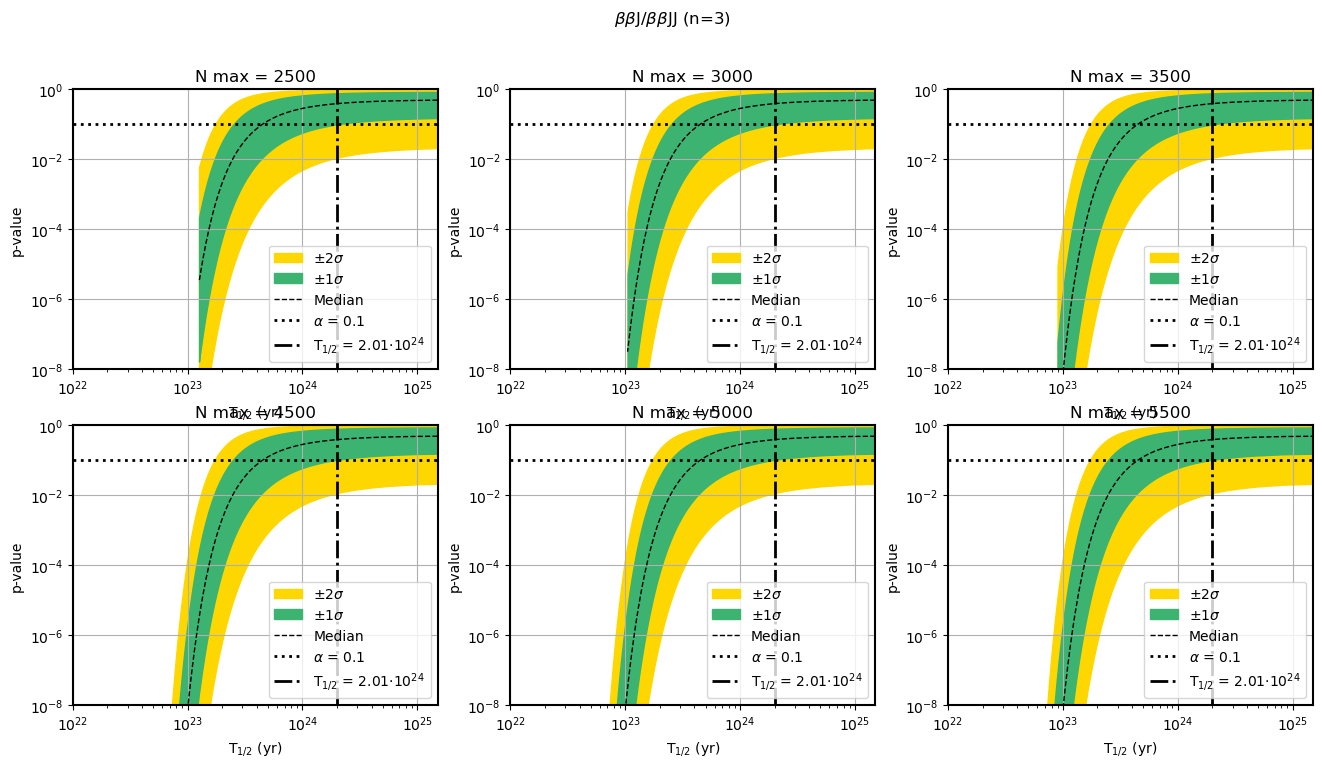

In [29]:
lab       = labels      [2]
lab_fancy = labels_fancy[2]
sig_dist  = signal_dists[2]

fig, axs = plt.subplots(2, 3, figsize=(16, 8))
fig.suptitle(lab_fancy)

for n_max, ax in zip([2500, 3000, 3500, 4500, 5000, 5500], axs.flatten()):
    sig_dist_fitrange    = sig_dist[min_bin:max_bin + 1]
    majoron_fitrange_eff = np.sum(sig_dist_fitrange) # sig_dist already normalized to 1
    signal_pdf           = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)
    model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

    real_data = zfit.data    .BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))
    nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name='hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)
    #n_signal_hypotest_vals = np.linspace(n_max / 20., n_max, 200)
    #n_signal_hypotest_vals = np.linspace(10, n_max, 200)
    n_signal_hypotest_vals = np.linspace(10, n_max, 200)
    
    poialt   = POI(n_signal, 0) # Background only
    poinull  = POIarray(n_signal, n_signal_hypotest_vals) # Background + signal
    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2], onesided=True)

    full_spec_cts      = n_signal_hypotest_vals / majoron_fitrange_eff
    real_full_spec_cts = full_spec_cts / eff
    half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
    inv_half_life      = 1 / half_life
    
    ax.fill_between(half_life, expected[3], expected[4], color='gold',           label=r'$\pm 2\sigma$')
    ax.fill_between(half_life, expected[1], expected[2], color='mediumseagreen', label=r'$\pm 1\sigma$')
    ax.plot(half_life, expected[0], c='black', lw=1, ls='dashed', label='Median')
    ax.axhline(alpha, lw=2, ls='dotted', color='black', label=r'$\alpha$ = ' + str(alpha))
    ax.axvline(half_life_sens, lw=2, ls='dashdot', color='black', label='T$_{1/2}$ = ' + sci_notation(half_life_sens, precision=2, decimal_digits=2))
    ax.legend(loc='lower right')
    set_border_line_width(ax, 1.5)
    ax.set_xlabel(r'T$_{1/2}$ (yr)')
    ax.set_ylabel('p-value')
    #ax.set_xlim(min(half_life), max(half_life))
    ax.set_xlim(1e22, 1.5e25)
    ax.set_ylim(1e-8, 1)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title(f'N max = {n_max}')
    ax.grid()
plt.show()

## Sterile neutrinos

In [30]:
sterile_masses_keV     = np.arange(100, 1300, 100)
full_spec_phasesp_rats = []
lef_signal_dist        = []

# Reference spectrum to calculate phase space ratios
phasesp_ref_nnbb_dist = np.loadtxt(basepath + 'dist/sterile/76Ge_2vbb_mnu_0_0_keV/76Ge_sums.txt', usecols=(2), unpack=True)
phasesp_ref_nnbb_dist = phasesp_ref_nnbb_dist / np.sum(phasesp_ref_nnbb_dist) # Normalize to unit area

for idx, sterile_mass_keV in enumerate(sterile_masses_keV):
    sdist = np.loadtxt((basepath + 'dist/sterile/76Ge_2vbb_mnu_{}_0_keV/76Ge_sums.txt'.format(sterile_mass_keV)), usecols=(2))
    sdist = np.insert(sdist, 0, 0, axis=0)
    sdist = sdist / np.sum(sdist)

    lef_signal_dist       .append(sdist)
    full_spec_phasesp_rats.append(np.sum(sdist) / np.sum(phasesp_ref_nnbb_dist))

In [31]:
# Input for fitting loop
labels       = ['m_N_'      + str(sterile_mass_keV) + '_keV' for sterile_mass_keV in sterile_masses_keV]
labels_fancy = [r'm$_N$ = ' + str(sterile_mass_keV) + ' keV' for sterile_mass_keV in sterile_masses_keV]
#sin_theta_sq_max_list = [0.015,0.006,0.004,0.004,0.003,0.004,0.006,0.008,0.015,0.025,0.04,0.1]
sin_theta_sq_max_list = [0.05 for _ in range(len(sterile_masses_keV))]

# ===========================================================================

# Setup zfit values
obs = zfit.Space('E', limits=limits, binning=binning)

# Number of background NON-2vBB events. 2vBB events are special in this analysis
n_bckg = zfit.Parameter('n_bckg', Nbckg, 0, step_size=0.01)
bckg_model_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=bckg_model_fitrange), extended=n_bckg)

def calculate_n_vvBB(sin_theta_sq, n_vvBB_theta_0):
    return (1 - sin_theta_sq) * (1 - sin_theta_sq) * n_vvBB_theta_0

def calculate_n_vNBB(sin_theta_sq, n_vvBB_theta_0, phasespace_ratio):
    return 2 * (1 - sin_theta_sq) * sin_theta_sq * n_vvBB_theta_0 * phasespace_ratio

# How many 2vBB events there would be at 0 mixing angle
n_vvBB_theta_0 = zfit.Parameter('n_vvBB_theta_0', NvvBB, lower=0, step_size=0.01)
sin_theta_sq   = zfit.Parameter(  'sin_theta_sq',     0, lower=0, step_size=0.01)

# Setup vvBB distribution with calculated counts
n_vvBB   = zfit.ComposedParameter('n_vvBB', calculate_n_vvBB, params=[sin_theta_sq, n_vvBB_theta_0])
vvBB_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=vvBB_model_fitrange), extended = n_vvBB)

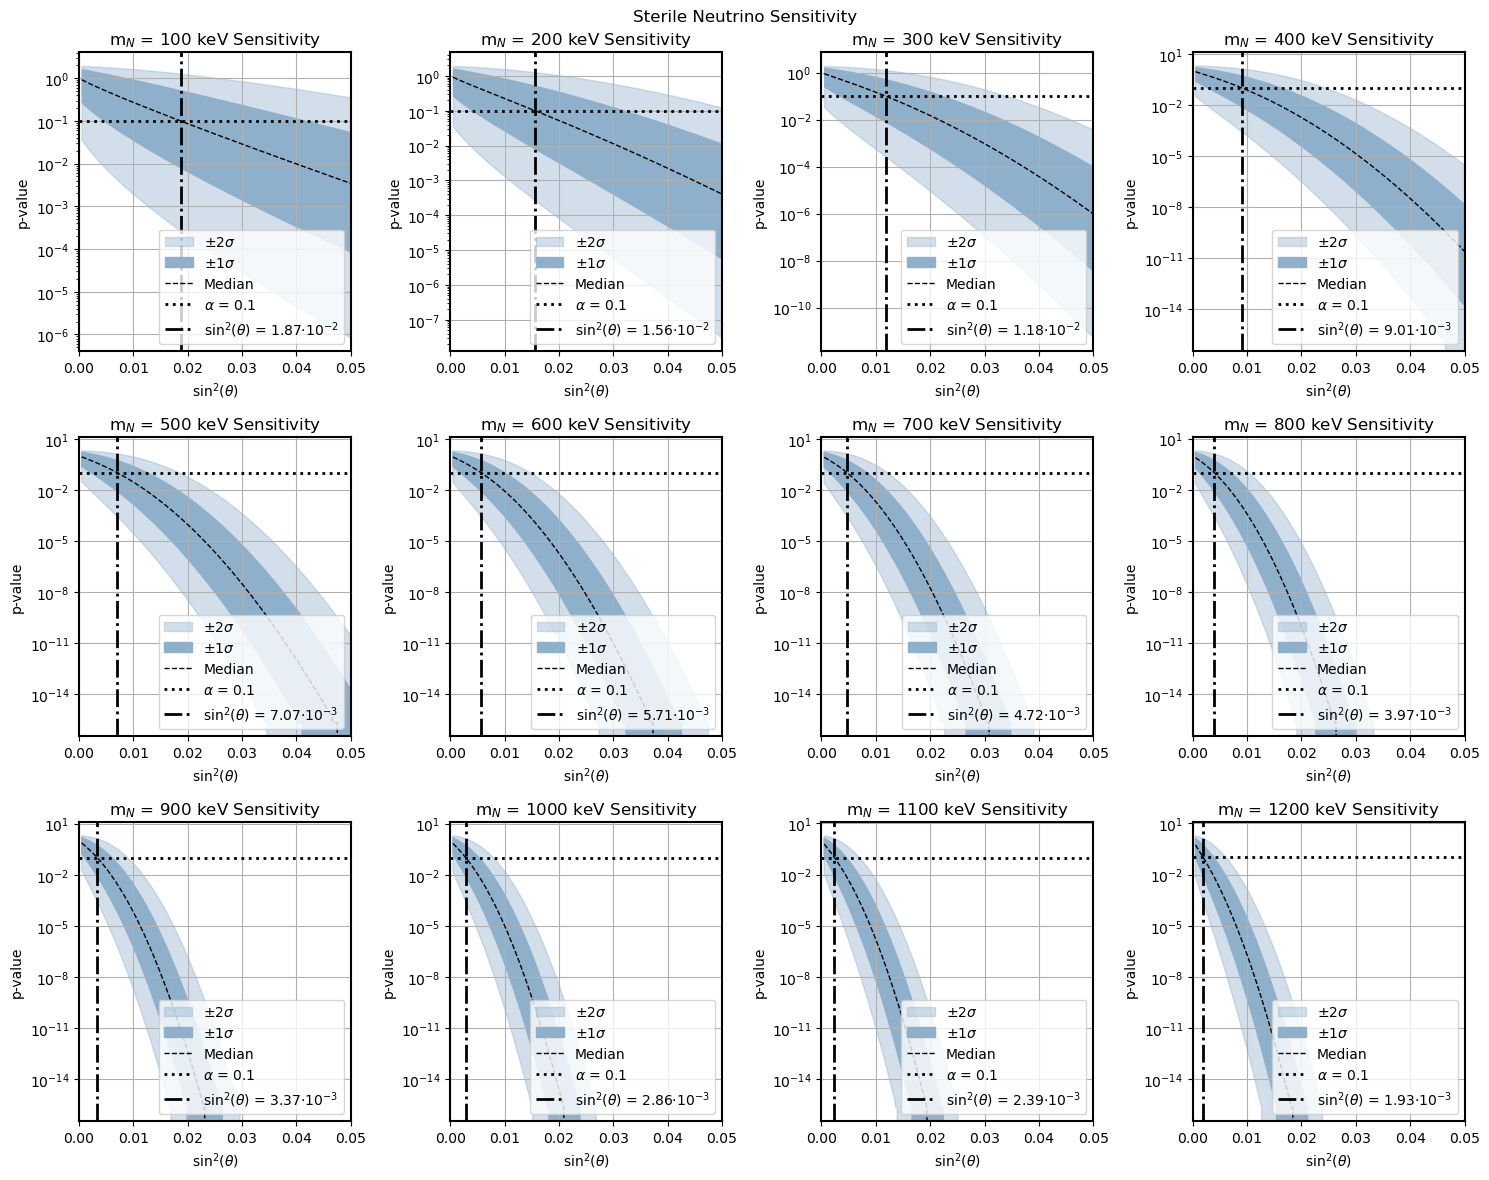

In [33]:
# Prepare combined graph
n_rows      = 3
n_columns   = len(lef_signal_dist) // n_rows
combined_fig, combined_ax = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(15, 12))
combined_ax = combined_ax.flatten()

combined_fig.suptitle('Sterile Neutrino Sensitivity')

all_sin_theta_sq_sens = []
for idx, (lab, lab_fancy, sterile_mass_keV, sig_dist, sin_theta_sq_max, full_spec_phasesp_rat) in enumerate(zip(labels, labels_fancy, sterile_masses_keV, lef_signal_dist, sin_theta_sq_max_list, full_spec_phasesp_rats)):

    if idx > 20:
        continue
    if 2039 - sterile_mass_keV < min_bin: # First check that the endpoint is in the fit range
        continue

    sig_dist_fitrange     = sig_dist[min_bin:max_bin + 1]
    part_spec_phasesp_rat = full_spec_phasesp_rat * np.sum(sig_dist_fitrange)
    
    n_vNBB   = zfit.ComposedParameter('n_vNBB', calculate_n_vNBB, params=[sin_theta_sq, n_vvBB_theta_0, part_spec_phasesp_rat])
    vNBB_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_vNBB)
    
    # Model (vvBB + vNBB + background)
    # Since both signal_pdf and background_model_pdf are extended PDF's we should not specify the fraction of each PDF
    model = zfit.pdf.BinnedSumPDF([vvBB_pdf, vNBB_pdf, bckg_model_pdf])

    sin_theta_sq  .set_value(0)
    n_vvBB_theta_0.set_value(NvvBB)
    n_bckg        .set_value(Nbckg)

    real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))
    # In theory the 'subtr_const': True should offset the loss function closer to 0. In practice the opposite is true.
    # After perusing the source code (https://zfit.readthedocs.io/en/v0.18.1/_modules/zfit/core/loss.html)
    # I see zfit is calculating `log_offset = (NLL - 10000) / nEventsTot` which is completely bogus for a binned fit
    # zfit should be using `log_offset = NLL / binning` because binning is the amount of bins we are actually fitting
    # In fact the loss function L is defined (https://zfit.readthedocs.io/en/stable/user_api/_generated/loss/zfit.loss.ExtendedBinnedNLL.html#extendedbinnednll)
    # as a product over the bins, so NLL will be O(binning) and not O(nEventsTot). So the calculated log_offset is bogus - Lars, June 24, 2024
    # nll = zfit.loss.ExtendedBinnedNLL(model, zfit.data.BinnedData.from_tensor(space=obs, values=model.counts()), options = {'subtr_const' : False})
    nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options={'subtr_const': False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    # Perturb n_signal away from 0 to get out of a local minimum at 0
    # Even when n_signal for the fake_data != 0 the fitting gets stuck there for some reason
    # This only happens sometimes, and more often when I don't bound n_signal, n_bckg > 0
    sin_theta_sq  .set_value(0.001)
    n_vvBB_theta_0.set_value(NvvBB)
    n_bckg        .set_value(Nbckg)

    result = minimizer.minimize(nll)
    result.hesse(name='hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)
    
    # https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
    sin_theta_sq_hypot_vals = np.linspace(sin_theta_sq_max / 100., sin_theta_sq_max, 200)
    
    poialt   = POI(sin_theta_sq, 0) # Background only
    poinull  = POIarray(sin_theta_sq, sin_theta_sq_hypot_vals) # Background + signal
    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2], onesided=False)
    
    sin_theta_sq_sens = find_zero_crossing(sin_theta_sq_hypot_vals, expected[0] - alpha)[0]
    all_sin_theta_sq_sens.append(sin_theta_sq_sens)

    # Plot result on both individual and combined plots
    fig, ax = plt.subplots()
    ax_to_plot = [ax, combined_ax[idx]]
    for ax in ax_to_plot:
        ax.fill_between(sin_theta_sq_hypot_vals, expected[3], expected[4], color='#8FB0CB', label=r'$\pm 2\sigma$', alpha=0.4)
        ax.fill_between(sin_theta_sq_hypot_vals, expected[1], expected[2], color='#8FB0CB', label=r'$\pm 1\sigma$')
        ax.plot(sin_theta_sq_hypot_vals, expected[0], c='black', lw=1, ls='dashed', label='Median')
        ax.axhline(alpha,             lw=2, ls='dotted',  color='black', label=r'$\alpha$ = ' + str(alpha))
        ax.axvline(sin_theta_sq_sens, lw=2, ls='dashdot', color='black', label=r'sin$^2(\theta)$ = ' + sci_notation(sin_theta_sq_sens, precision=2, decimal_digits=2))
        set_border_line_width(ax, 1.5)
        ax.set_title(lab_fancy + ' Sensitivity')
        ax.set_xlabel(r'sin$^2(\theta)$')
        ax.set_ylabel('p-value')
        #ax.set_xlim(min(sin_theta_sq_hypot_vals), max(sin_theta_sq_hypot_vals))
        #ax.set_xlim(sin_theta_sq_sens-0.02, sin_theta_sq_sens+0.02)
        ax.set_xlim(0, 0.05)
        ax.set_yscale('log')
        ax.legend(loc='lower right')
        ax.grid()
    fig.savefig('./images/sterile_' + lab + '.pdf', bbox_inches='tight')
    plt.close(fig)

combined_fig.tight_layout()
combined_fig.savefig('./images/sterile_combined.pdf', bbox_inches='tight')
plt.show()

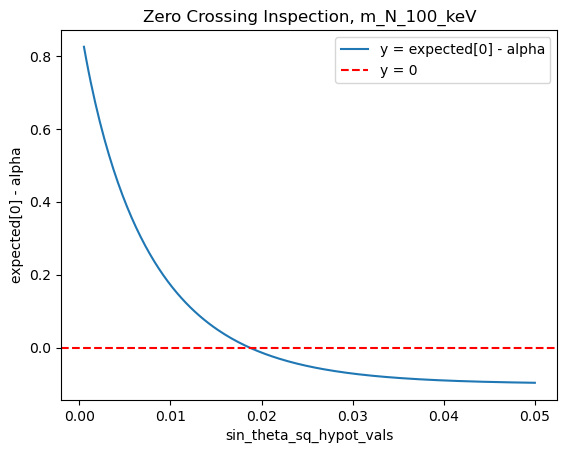

Zero Crossings: [0.01867768]


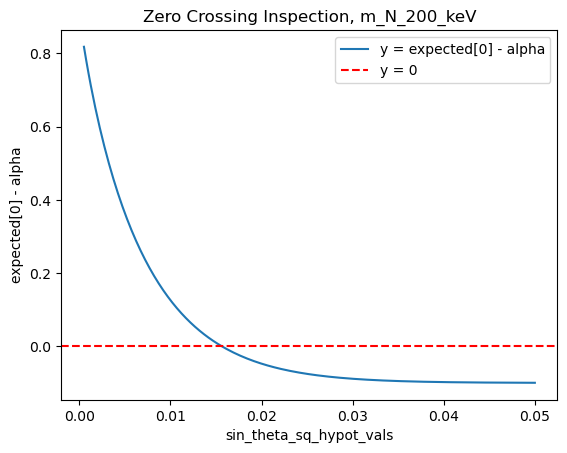

Zero Crossings: [0.01564255]


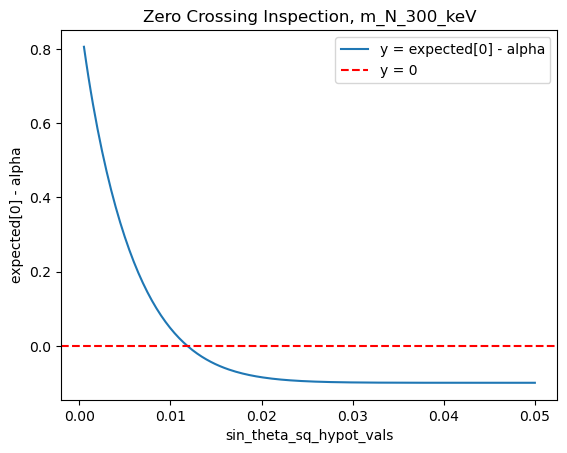

Zero Crossings: [0.01182925]


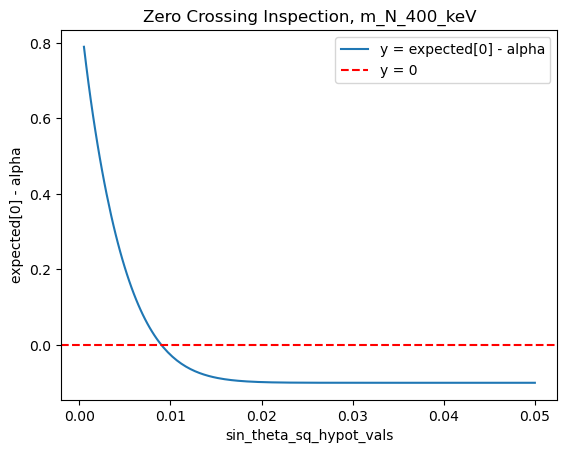

Zero Crossings: [0.00900808]


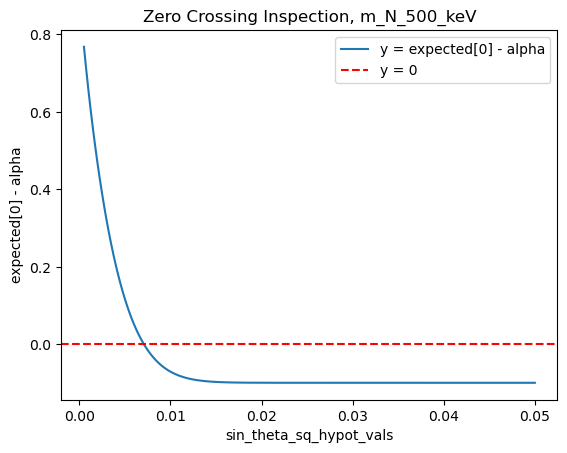

Zero Crossings: [0.00707323]


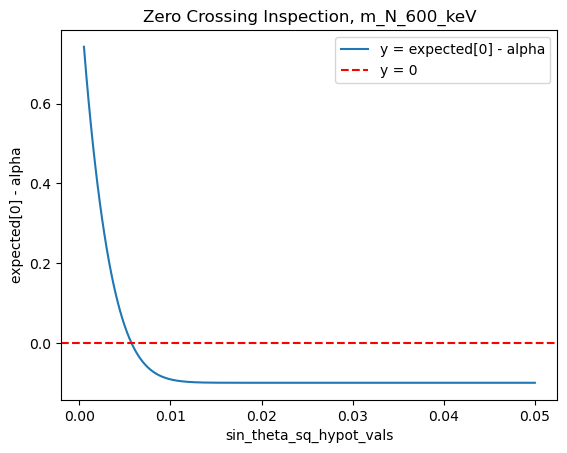

Zero Crossings: [0.00571286]


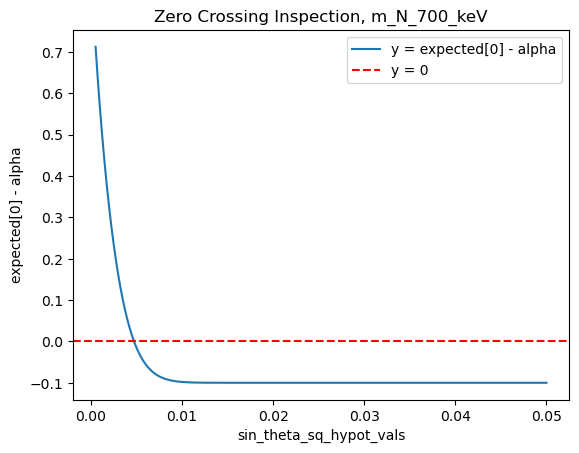

Zero Crossings: [0.00472107]


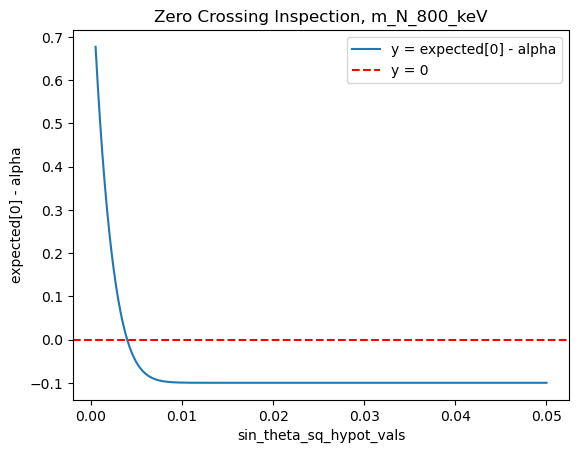

Zero Crossings: [0.00396906]


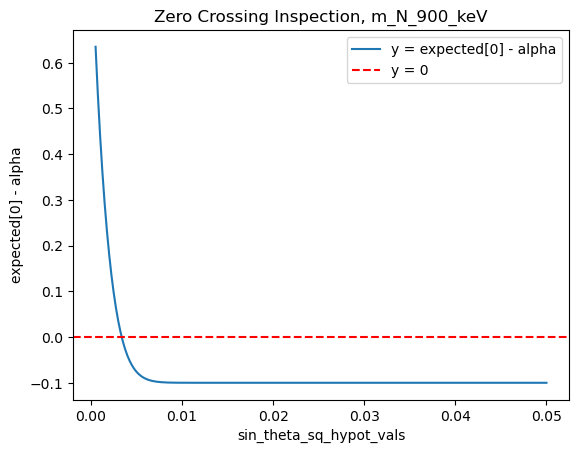

Zero Crossings: [0.00336995]


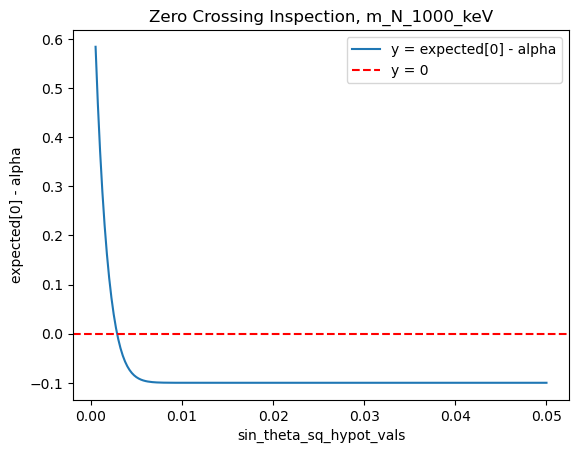

Zero Crossings: [0.00285962]


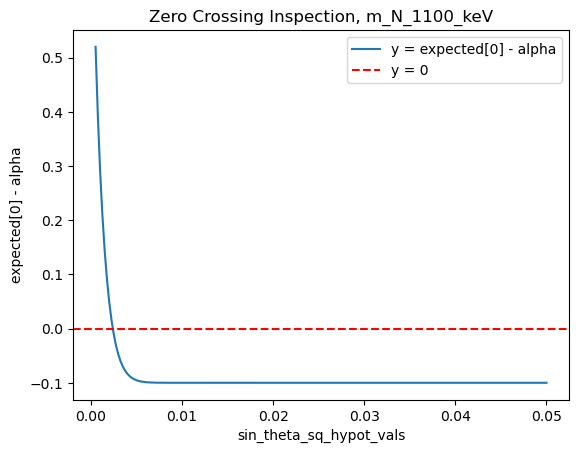

Zero Crossings: [0.00239014]


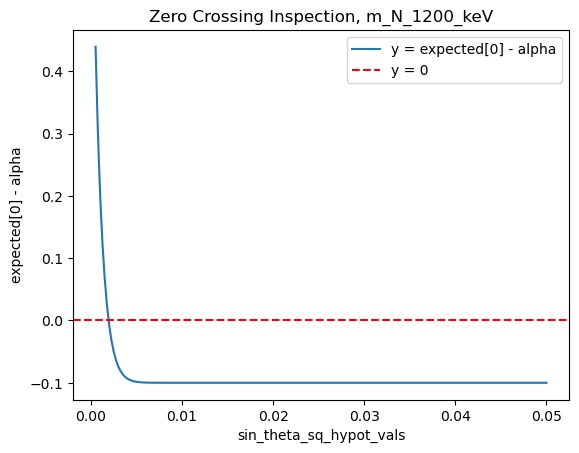

Zero Crossings: [0.00193014]


In [34]:
for idx, (lab, lab_fancy, sterile_mass_keV, sig_dist, sin_theta_sq_max, full_spec_phasesp_rat) in enumerate(zip(labels, labels_fancy, sterile_masses_keV, lef_signal_dist, sin_theta_sq_max_list, full_spec_phasesp_rats)):

    if 2039 - sterile_mass_keV < min_bin: # First check that the endpoint is in the fit range
        continue

    sig_dist_fitrange     = sig_dist[min_bin:max_bin + 1]
    part_spec_phasesp_rat = full_spec_phasesp_rat * np.sum(sig_dist_fitrange)
    
    n_vNBB   = zfit.ComposedParameter('n_vNBB', calculate_n_vNBB, params=[sin_theta_sq, n_vvBB_theta_0, part_spec_phasesp_rat])
    vNBB_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_vNBB)
    
    model = zfit.pdf.BinnedSumPDF([vvBB_pdf, vNBB_pdf, bckg_model_pdf])

    sin_theta_sq  .set_value(0)
    n_vvBB_theta_0.set_value(NvvBB)
    n_bckg        .set_value(Nbckg)

    real_data = zfit.data    .BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))
    nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options={'subtr_const': False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    sin_theta_sq  .set_value(0.001)
    n_vvBB_theta_0.set_value(NvvBB)
    n_bckg        .set_value(Nbckg)

    result = minimizer.minimize(nll)
    result.hesse(name='hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)
    
    sin_theta_sq_hypot_vals = np.linspace(sin_theta_sq_max / 100., sin_theta_sq_max, 200)
    
    poialt   = POI(sin_theta_sq, 0) # Background only
    poinull  = POIarray(sin_theta_sq, sin_theta_sq_hypot_vals) # Background + signal
    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2], onesided=False)

    
    plt.plot(sin_theta_sq_hypot_vals, expected[0] - alpha, label='y = expected[0] - alpha')
    plt.axhline(0, color='red', linestyle='--', label='y = 0')
    plt.xlabel('sin_theta_sq_hypot_vals')
    plt.ylabel('expected[0] - alpha')
    plt.title(f'Zero Crossing Inspection, {lab}')
    plt.legend()
    plt.show()
    
    zero_crossings = find_zero_crossing(sin_theta_sq_hypot_vals, expected[0] - alpha)
    print("Zero Crossings:", zero_crossings)

## Double exotic fermion decay

IndexError: index 0 is out of bounds for axis 0 with size 0

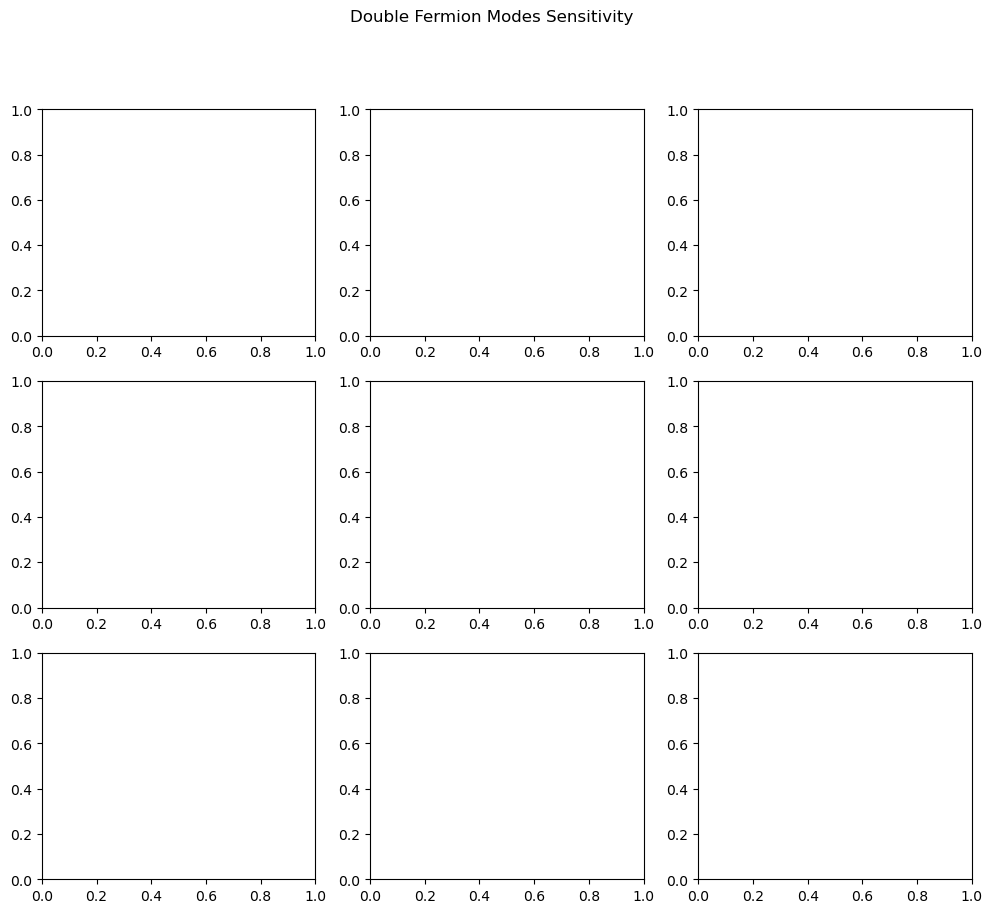

In [62]:
labels       = ['m_chi_'         + str(fermion_mass_keV) + '_keV' for fermion_mass_keV in light_fermion_masses_keV]
labels_fancy = [r'm$_{\chi}$ = ' + str(fermion_mass_keV) + ' keV' for fermion_mass_keV in light_fermion_masses_keV]
n_max_list   = [10000, 10000, 10000, 10000, 5000, 2000, 2000, 2000, 300]

# ===========================================================================
# Setup zfit values
obs      = zfit.Space('E', limits=limits, binning=binning)
n_signal = zfit.Parameter('n_signal',   0, 0, step_size=0.01)
n_bckg   = zfit.Parameter('n_bckg', Nbckg, 0, step_size=0.01)
n_vvBB   = zfit.Parameter('n_2vBB', NvvBB, 0, step_size=0.01)

# Pdfs
bckg_model_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=bckg_model_fitrange), extended=n_bckg)
vvBB_pdf       = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=vvBB_model_fitrange), extended=n_vvBB)

all_half_life_sens = []

n_rows      = 3
n_columns   = (len(def_signal_dist) + 1) // n_rows
combined_fig, combined_ax = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(12, 10))
combined_ax = combined_ax.flatten()

combined_fig.suptitle('Double Fermion Modes Sensitivity')

for idx, (lab, lab_fancy, fmass_keV, sig_dist, n_max) in enumerate(zip(labels, labels_fancy, light_fermion_masses_keV, def_signal_dist, n_max_list)):
    # First check that the endpoint is in the fit range
    if 2039 - 2 * fermion_mass_keV < min_bin:
        continue

    sig_dist_fitrange     = sig_dist[min_bin:max_bin + 1]
    sig_dist_fitrange_eff = np.sum(sig_dist_fitrange) # sig_distribution already normalized to 1
    signal_pdf            = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)
    # Model (signal + background)
    # Since both signal_pdf and background_model_pdf are extended PDF's we should not specify the fraction of each PDF
    model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

    n_signal.set_value(0)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))

    # In theory the 'subtr_const': True should offset the loss function closer to 0. In practice the opposite is true.
    # After perusing the source code (https://zfit.readthedocs.io/en/v0.18.1/_modules/zfit/core/loss.html)
    # I see zfit is calculating `log_offset = (NLL - 10000) / nEventsTot` which is completely bogus for a binned fit
    # zfit should be using `log_offset = NLL / binning` because binning is the amount of bins we are actually fitting
    # In fact the loss function L is defined (https://zfit.readthedocs.io/en/stable/user_api/_generated/loss/zfit.loss.ExtendedBinnedNLL.html#extendedbinnednll)
    # as a product over the bins, so NLL will be O(binning) and not O(nEventsTot). So the calculated log_offset is bogus - Lars, June 24, 2024
    # nll = zfit.loss.ExtendedBinnedNLL(model, zfit.data.BinnedData.from_tensor(space=obs, values=model.counts()), options = {'subtr_const' : False})
    nll       = zfit.loss.ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    # Perturb n_signal away from 0 to get out of a local minimum at 0
    # Even when n_signal for the fake_data != 0 the fitting gets stuck there for some reason
    # This only happens sometimes, and more often when I don't bound n_signal, n_background > 0
    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name = 'hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

    # https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
    n_signal_hypot_vals = np.linspace(n_max / 20., n_max, 200)
    poialt  = POI(n_signal, 0) # Background only
    poinull = POIarray(n_signal, n_signal_hypot_vals) # Background + signal

    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2])

    full_spec_cts      = n_signal_hypot_vals / sig_dist_fitrange_eff
    real_full_spec_cts = full_spec_cts / eff
    half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
    inv_half_life      = 1 / half_life

    # Calculate sensitivity
    n_signal_sens           = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)[0]
    n_signal_full_spec_sens = n_signal_sens / sig_dist_fitrange_eff
    real_full_spec_sens     = n_signal_full_spec_sens / eff
    half_life_sens          = (NA / mA) * (math.log(2) / real_full_spec_sens) * exposure
    inv_half_life_sens      = 1 / half_life_sens

    all_half_life_sens.append(half_life_sens)
    
    # Plot result on both individual and combined plots
    fig, ax = plt.subplots()
    ax_to_plot = [ax, combined_ax[idx]]
    for ax in ax_to_plot:
        ax.fill_between(half_life, expected[3], expected[4], color='#8FB0CB', label=r'$\pm 2\sigma$', alpha=0.4)
        ax.fill_between(half_life, expected[1], expected[2], color='#8FB0CB', label=r'$\pm 1\sigma$')
        ax.plot(half_life, expected[0], c='black', lw=1, ls='dashed', label='Median')
        ax.axhline(alpha, lw=2, ls='dotted', color='black', label=r'$\alpha$ = ' + str(alpha))
        ax.axvline(half_life_sens, lw=2, ls='dashdot', color='black', label='T$_{1/2}$ = ' + sci_notation(half_life_sens, precision=2, decimal_digits=2))
        set_border_line_width(ax, 1.5)
        ax.set_title(lab_fancy + ' Sensitivity')
        ax.set_xlabel(r'T$_{1/2}$ (yr)')
        ax.set_ylabel('p-value')
        ax.set_xlim(min(half_life), max(half_life))
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.legend(loc='lower right')
        ax.grid()
    fig.savefig('./images/doubleF_' + lab + '.pdf', bbox_inches = 'tight')
    plt.close(fig)

combined_fig.tight_layout()
combined_fig.savefig('./images/doubleF_combined.pdf', bbox_inches = 'tight')
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

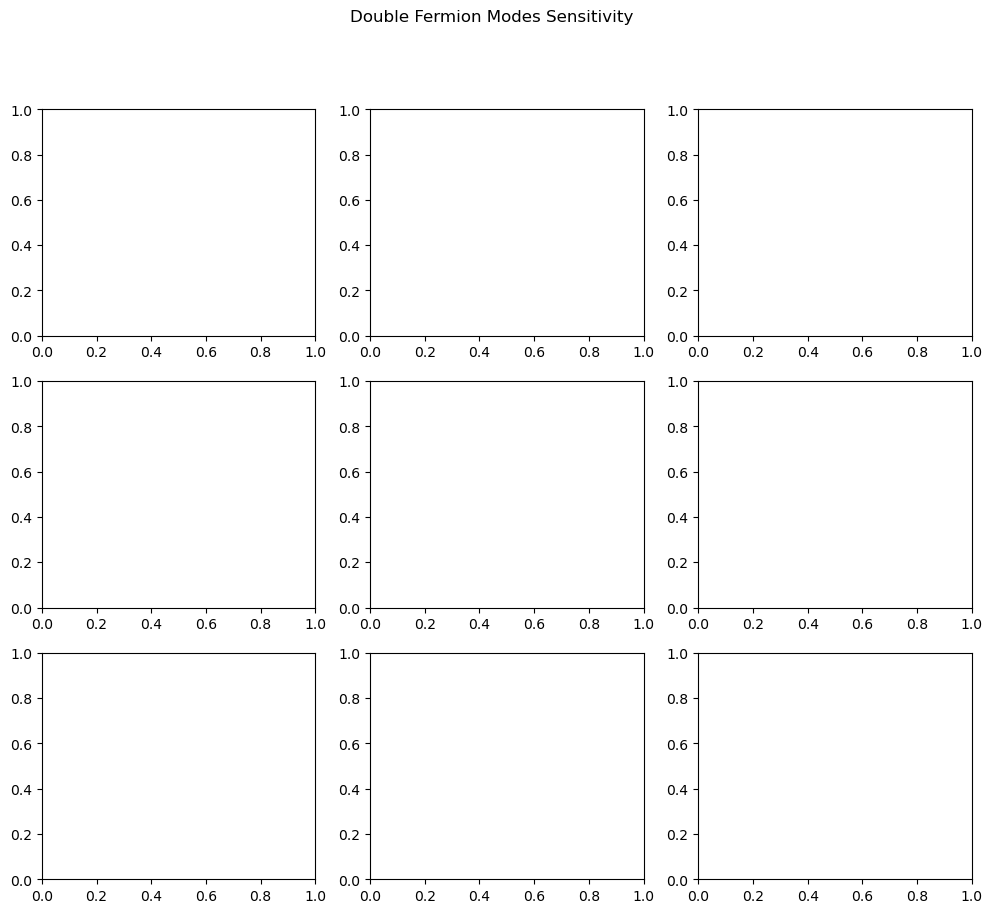

In [61]:
labels       = ['m_chi_'         + str(fermion_mass_keV) + '_keV' for fermion_mass_keV in light_fermion_masses_keV]
labels_fancy = [r'm$_{\chi}$ = ' + str(fermion_mass_keV) + ' keV' for fermion_mass_keV in light_fermion_masses_keV]
n_max_list   = [10000, 10000, 10000, 10000, 5000, 2000, 2000, 2000, 300]

# ===========================================================================
# Setup zfit values
obs      = zfit.Space('E', limits=limits, binning=binning)
n_signal = zfit.Parameter('n_signal',   0, 0, step_size=0.01)
n_bckg   = zfit.Parameter('n_bckg', Nbckg, 0, step_size=0.01)
n_vvBB   = zfit.Parameter('n_2vBB', NvvBB, 0, step_size=0.01)

# Pdfs
bckg_model_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=bckg_model_fitrange), extended=n_bckg)
vvBB_pdf       = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=vvBB_model_fitrange), extended=n_vvBB)

all_half_life_sens = []

n_rows      = 3
n_columns   = (len(def_signal_dist) + 1) // n_rows
combined_fig, combined_ax = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(12, 10))
combined_ax = combined_ax.flatten()

combined_fig.suptitle('Double Fermion Modes Sensitivity')

for idx, (lab, lab_fancy, fmass_keV, sig_dist, n_max) in enumerate(zip(labels, labels_fancy, light_fermion_masses_keV, def_signal_dist, n_max_list)):
    # First check that the endpoint is in the fit range
    if 2039 - 2 * fermion_mass_keV < min_bin:
        continue

    sig_dist_fitrange     = sig_dist[min_bin:max_bin + 1]
    sig_dist_fitrange_eff = np.sum(sig_dist_fitrange) # sig_distribution already normalized to 1
    signal_pdf            = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)
    # Model (signal + background)
    # Since both signal_pdf and background_model_pdf are extended PDF's we should not specify the fraction of each PDF
    model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

    n_signal.set_value(0)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))

    # In theory the 'subtr_const': True should offset the loss function closer to 0. In practice the opposite is true.
    # After perusing the source code (https://zfit.readthedocs.io/en/v0.18.1/_modules/zfit/core/loss.html)
    # I see zfit is calculating `log_offset = (NLL - 10000) / nEventsTot` which is completely bogus for a binned fit
    # zfit should be using `log_offset = NLL / binning` because binning is the amount of bins we are actually fitting
    # In fact the loss function L is defined (https://zfit.readthedocs.io/en/stable/user_api/_generated/loss/zfit.loss.ExtendedBinnedNLL.html#extendedbinnednll)
    # as a product over the bins, so NLL will be O(binning) and not O(nEventsTot). So the calculated log_offset is bogus - Lars, June 24, 2024
    # nll = zfit.loss.ExtendedBinnedNLL(model, zfit.data.BinnedData.from_tensor(space=obs, values=model.counts()), options = {'subtr_const' : False})
    nll       = zfit.loss.ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    # Perturb n_signal away from 0 to get out of a local minimum at 0
    # Even when n_signal for the fake_data != 0 the fitting gets stuck there for some reason
    # This only happens sometimes, and more often when I don't bound n_signal, n_background > 0
    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name = 'hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

    # https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
    n_signal_hypot_vals = np.linspace(n_max / 20., n_max, 200)
    poialt  = POI(n_signal, 0) # Background only
    poinull = POIarray(n_signal, n_signal_hypot_vals) # Background + signal

    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2])

    full_spec_cts      = n_signal_hypot_vals / sig_dist_fitrange_eff
    real_full_spec_cts = full_spec_cts / eff
    half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
    inv_half_life      = 1 / half_life

    # Calculate sensitivity
    n_signal_sens           = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)[0]
    n_signal_full_spec_sens = n_signal_sens / sig_dist_fitrange_eff
    real_full_spec_sens     = n_signal_full_spec_sens / eff
    half_life_sens          = (NA / mA) * (math.log(2) / real_full_spec_sens) * exposure
    inv_half_life_sens      = 1 / half_life_sens

    all_half_life_sens.append(half_life_sens)
    
    # Plot result on both individual and combined plots
    fig, ax = plt.subplots()
    ax_to_plot = [ax, combined_ax[idx]]
    for ax in ax_to_plot:
        ax.fill_between(half_life, expected[3], expected[4], color='#8FB0CB', label=r'$\pm 2\sigma$', alpha=0.4)
        ax.fill_between(half_life, expected[1], expected[2], color='#8FB0CB', label=r'$\pm 1\sigma$')
        ax.plot(half_life, expected[0], c='black', lw=1, ls='dashed', label='Median')
        ax.axhline(alpha, lw=2, ls='dotted', color='black', label=r'$\alpha$ = ' + str(alpha))
        ax.axvline(half_life_sens, lw=2, ls='dashdot', color='black', label='T$_{1/2}$ = ' + sci_notation(half_life_sens, precision=2, decimal_digits=2))
        set_border_line_width(ax, 1.5)
        ax.set_title(lab_fancy + ' Sensitivity')
        ax.set_xlabel(r'T$_{1/2}$ (yr)')
        ax.set_ylabel('p-value')
        ax.set_xlim(1e22, 2e25)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.legend(loc='lower right')
        ax.grid()
    plt.close(fig)

combined_fig.tight_layout()
plt.show()

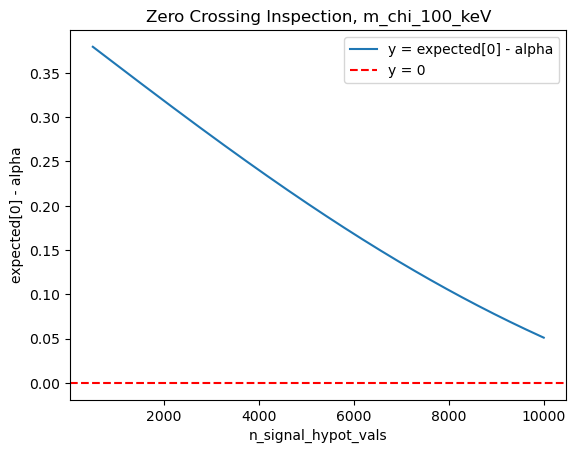

IndexError: index 0 is out of bounds for axis 0 with size 0

In [59]:
lab       = labels                  [0]
lab_fancy = labels_fancy            [0]
sig_dist  = def_signal_dist         [0]
fmass_keV = light_fermion_masses_keV[0]
n_max     = n_max_list              [0]

#fig, axs = plt.subplots(2, 3, figsize=(16, 8))
#fig.suptitle(lab_fancy)
    
for n_min, ax in zip([500, 600, 700, 800, 900, 1000], axs.flatten()):
    sig_dist_fitrange     = sig_dist[min_bin:max_bin + 1]
    sig_dist_fitrange_eff = np.sum(sig_dist_fitrange) # sig_distribution already normalized to 1
    signal_pdf            = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)
    model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

    n_signal.set_value(0)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))
    nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
    minimizer = zfit.minimize.Minuit(verbosity=0)
    
    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name = 'hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

    n_signal_hypot_vals = np.linspace(n_min, n_max, 200)
    poialt  = POI(n_signal, 0) # Background only
    poinull = POIarray(n_signal, n_signal_hypot_vals) # Background + signal

    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2])

    full_spec_cts      = n_signal_hypot_vals / sig_dist_fitrange_eff
    real_full_spec_cts = full_spec_cts / eff
    half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
    inv_half_life      = 1 / half_life
    
    plt.plot(n_signal_hypot_vals, expected[0] - alpha, label='y = expected[0] - alpha')
    plt.axhline(0, color='red', linestyle='--', label='y = 0')
    plt.xlabel('n_signal_hypot_vals')
    plt.ylabel('expected[0] - alpha')
    plt.title(f'Zero Crossing Inspection, {lab}')
    plt.legend()
    plt.show()

    # Calculate sensitivity
    n_signal_sens           = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)[0]
    n_signal_full_spec_sens = n_signal_sens / sig_dist_fitrange_eff
    real_full_spec_sens     = n_signal_full_spec_sens / eff
    half_life_sens          = (NA / mA) * (math.log(2) / real_full_spec_sens) * exposure
    
    # Plot result on both individual and combined plots
    fig, ax = plt.subplots()
    ax_to_plot = [ax, combined_ax[idx]]
    for ax in ax_to_plot:
        ax.fill_between(half_life, expected[3], expected[4], color='gold', label=r'$\pm 2\sigma$', alpha=0.5)
        ax.fill_between(half_life, expected[1], expected[2], color='mediumseagreen', label=r'$\pm 1\sigma$')
        ax.plot(half_life, expected[0], c='black', lw=1, ls='dashed', label='Median')
        ax.axhline(alpha, lw=2, ls='dotted', color='black', label=r'$\alpha$ = ' + str(alpha))
        ax.axvline(half_life_sens, lw=2, ls='dashdot', color='black', label='T$_{1/2}$ = ' + sci_notation(half_life_sens, precision=2, decimal_digits=2))
        set_border_line_width(ax, 1.5)
        ax.set_title(lab_fancy + ' Sensitivity')
        ax.set_xlabel(r'T$_{1/2}$ (yr)')
        ax.set_ylabel('p-value')
        #ax.set_xlim(min(half_life), max(half_life))
        ax.set_xlim(1e22, 2e25)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.legend(loc='lower right')
        ax.grid()
    plt.close(fig)

combined_fig.tight_layout()
plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0

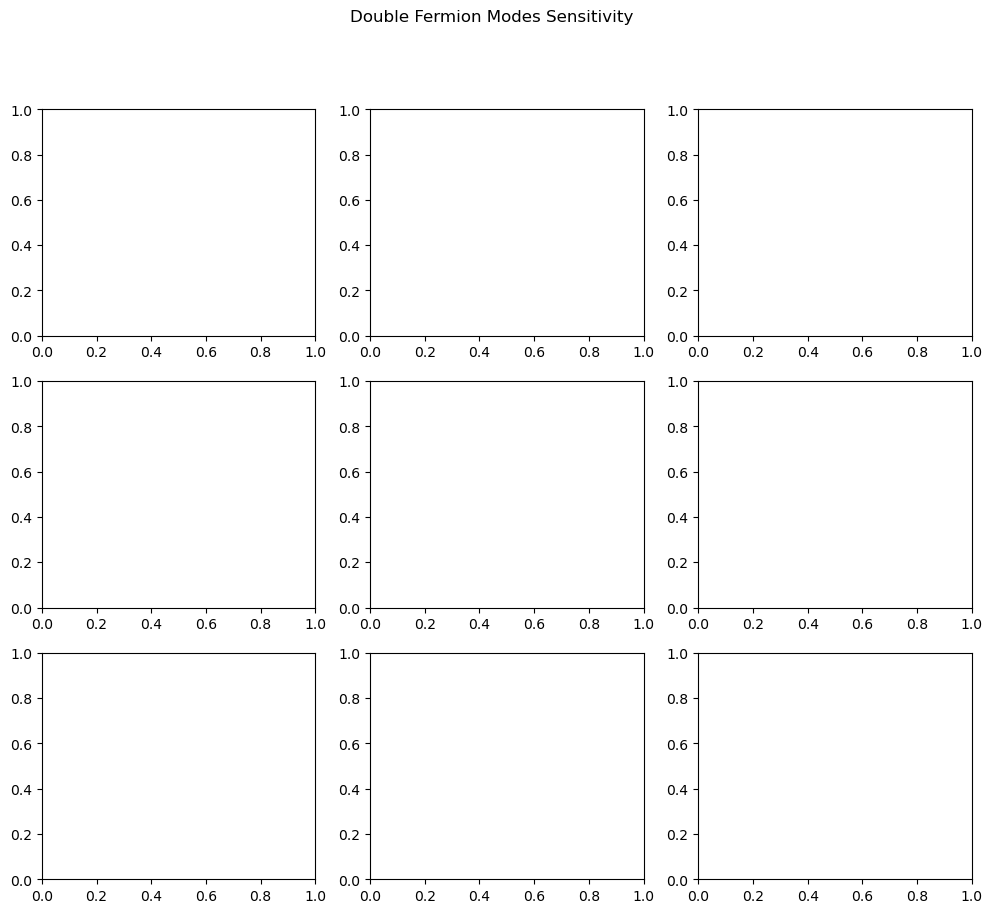

In [56]:
labels       = ['m_chi_'         + str(fermion_mass_keV) + '_keV' for fermion_mass_keV in light_fermion_masses_keV]
labels_fancy = [r'm$_{\chi}$ = ' + str(fermion_mass_keV) + ' keV' for fermion_mass_keV in light_fermion_masses_keV]
n_max_list   = [10000, 10000, 10000, 10000, 5000, 2000, 2000, 2000, 300]

# ===========================================================================
# Setup zfit values
obs      = zfit.Space('E', limits=limits, binning=binning)
n_signal = zfit.Parameter('n_signal',   0, 0, step_size=0.01)
n_bckg   = zfit.Parameter('n_bckg', Nbckg, 0, step_size=0.01)
n_vvBB   = zfit.Parameter('n_2vBB', NvvBB, 0, step_size=0.01)

# Pdfs
bckg_model_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=bckg_model_fitrange), extended=n_bckg)
vvBB_pdf       = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=vvBB_model_fitrange), extended=n_vvBB)

all_half_life_sens = []

n_rows      = 3
n_columns   = (len(def_signal_dist) + 1) // n_rows
combined_fig, combined_ax = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(12, 10))
combined_ax = combined_ax.flatten()

combined_fig.suptitle('Double Fermion Modes Sensitivity')

for idx, (lab, lab_fancy, fmass_keV, sig_dist, n_max) in enumerate(zip(labels, labels_fancy, light_fermion_masses_keV, def_signal_dist, n_max_list)):
    # First check that the endpoint is in the fit range
    if 2039 - 2 * fermion_mass_keV < min_bin:
        continue

    sig_dist_fitrange     = sig_dist[min_bin:max_bin + 1]
    sig_dist_fitrange_eff = np.sum(sig_dist_fitrange) # sig_distribution already normalized to 1
    signal_pdf            = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)
    # Model (signal + background)
    # Since both signal_pdf and background_model_pdf are extended PDF's we should not specify the fraction of each PDF
    model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

    n_signal.set_value(0)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))
    # In theory the 'subtr_const': True should offset the loss function closer to 0. In practice the opposite is true.
    # After perusing the source code (https://zfit.readthedocs.io/en/v0.18.1/_modules/zfit/core/loss.html)
    # I see zfit is calculating `log_offset = (NLL - 10000) / nEventsTot` which is completely bogus for a binned fit
    # zfit should be using `log_offset = NLL / binning` because binning is the amount of bins we are actually fitting
    # In fact the loss function L is defined (https://zfit.readthedocs.io/en/stable/user_api/_generated/loss/zfit.loss.ExtendedBinnedNLL.html#extendedbinnednll)
    # as a product over the bins, so NLL will be O(binning) and not O(nEventsTot). So the calculated log_offset is bogus - Lars, June 24, 2024
    # nll = zfit.loss.ExtendedBinnedNLL(model, zfit.data.BinnedData.from_tensor(space=obs, values=model.counts()), options = {'subtr_const' : False})
    nll       = zfit.loss.ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    # Perturb n_signal away from 0 to get out of a local minimum at 0
    # Even when n_signal for the fake_data != 0 the fitting gets stuck there for some reason
    # This only happens sometimes, and more often when I don't bound n_signal, n_background > 0
    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name = 'hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

    # https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
    n_signal_hypot_vals = np.linspace(400, n_max, 200)
    poialt  = POI(n_signal, 0) # Background only
    poinull = POIarray(n_signal, n_signal_hypot_vals) # Background + signal

    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2])

    full_spec_cts      = n_signal_hypot_vals / sig_dist_fitrange_eff
    real_full_spec_cts = full_spec_cts / eff
    half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
    inv_half_life      = 1 / half_life

    # Calculate sensitivity
    n_signal_sens           = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)[0]
    n_signal_full_spec_sens = n_signal_sens / sig_dist_fitrange_eff
    real_full_spec_sens     = n_signal_full_spec_sens / eff
    half_life_sens          = (NA / mA) * (math.log(2) / real_full_spec_sens) * exposure
    inv_half_life_sens      = 1 / half_life_sens

    all_half_life_sens.append(half_life_sens)
    
    # Plot result on both individual and combined plots
    fig, ax = plt.subplots()
    ax_to_plot = [ax, combined_ax[idx]]
    for ax in ax_to_plot:
        ax.fill_between(half_life, expected[3], expected[4], color='gold', label=r'$\pm 2\sigma$', alpha=0.5)
        ax.fill_between(half_life, expected[1], expected[2], color='mediumseagreen', label=r'$\pm 1\sigma$')
        ax.plot(half_life, expected[0], c='black', lw=1, ls='dashed', label='Median')
        ax.axhline(alpha, lw=2, ls='dotted', color='black', label=r'$\alpha$ = ' + str(alpha))
        ax.axvline(half_life_sens, lw=2, ls='dashdot', color='black', label='T$_{1/2}$ = ' + sci_notation(half_life_sens, precision=2, decimal_digits=2))
        set_border_line_width(ax, 1.5)
        ax.set_title(lab_fancy + ' Sensitivity')
        ax.set_xlabel(r'T$_{1/2}$ (yr)')
        ax.set_ylabel('p-value')
        #ax.set_xlim(min(half_life), max(half_life))
        ax.set_xlim(1e22, 2e25)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.legend(loc='lower right')
        ax.grid()
    plt.close(fig)

combined_fig.tight_layout()
plt.show()

In [ ]:
lab       = labels                  [0]
lab_fancy = labels_fancy            [0]
sig_dist  = def_signal_dist         [0]
fmass_keV = light_fermion_masses_keV[0]

fig, axs = plt.subplots(2, 3, figsize=(16, 8))
fig.suptitle(lab_fancy)

for n_max, ax in zip([3000, 6000, 7000, 8000, 9000, 10000, 11000], axs.flatten()):

    if 2039 - 2 * fermion_mass_keV < min_bin:
        continue

    sig_dist_fitrange     = sig_dist[min_bin:max_bin + 1]
    sig_dist_fitrange_eff = np.sum(sig_dist_fitrange) # sig_distribution already normalized to 1
    signal_pdf            = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)
    model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

    n_signal.set_value(0)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    real_data = zfit.data    .BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))
    nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name = 'hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

    n_signal_hypot_vals = np.linspace(n_max / 20., n_max, 200)
    poialt  = POI(n_signal, 0) # Background only
    poinull = POIarray(n_signal, n_signal_hypot_vals) # Background + signal

    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2])

    full_spec_cts      = n_signal_hypot_vals / sig_dist_fitrange_eff
    real_full_spec_cts = full_spec_cts / eff
    half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
    inv_half_life      = 1 / half_life

    n_signal_sens           = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)[0]
    n_signal_full_spec_sens = n_signal_sens / sig_dist_fitrange_eff
    real_full_spec_sens     = n_signal_full_spec_sens / eff
    half_life_sens          = (NA / mA) * (math.log(2) / real_full_spec_sens) * exposure
    inv_half_life_sens      = 1 / half_life_sens
    
    ax.fill_between(half_life, expected[3], expected[4], color='#8FB0CB', label=r'$\pm 2\sigma$', alpha=0.4)
    ax.fill_between(half_life, expected[1], expected[2], color='#8FB0CB', label=r'$\pm 1\sigma$')
    ax.plot(half_life, expected[0], c='black', lw=1, ls='dashed', label='Median')
    ax.axhline(alpha, lw=2, ls='dotted', color='black', label=r'$\alpha$ = ' + str(alpha))
    ax.axvline(half_life_sens, lw=2, ls='dashdot', color='black', label='T$_{1/2}$ = ' + sci_notation(half_life_sens, precision=2, decimal_digits=2))
    set_border_line_width(ax, 1.5)
    ax.set_title(f'N max = {n_max}')
    ax.set_xlabel(r'T$_{1/2}$ (yr)')
    ax.set_ylabel('p-value')
    #ax.set_xlim(min(half_life), max(half_life))
    ax.set_xlim(1e22, 2e25)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend(loc='lower right')
    ax.grid()

plt.tight_layout()
plt.show()

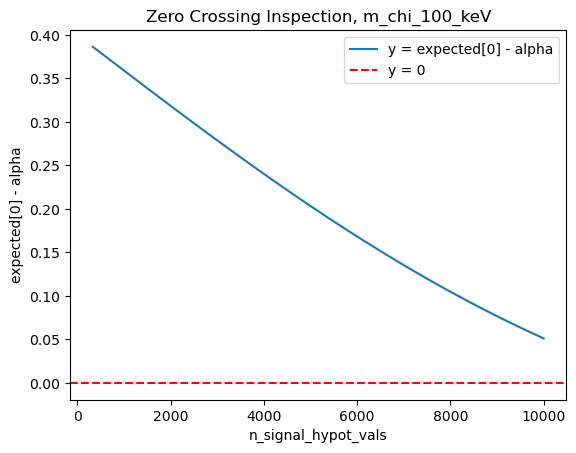

Zero Crossings: []


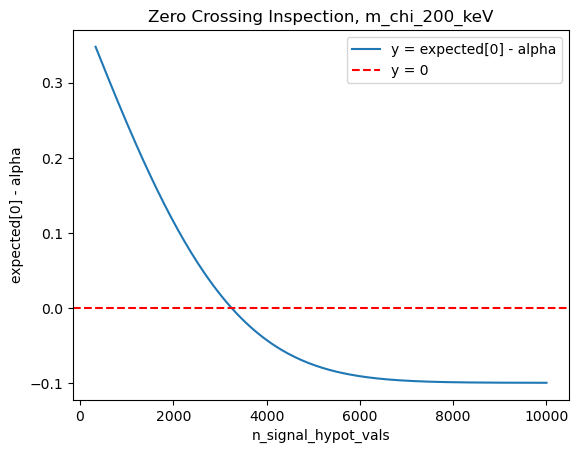

Zero Crossings: [3245.35211851]


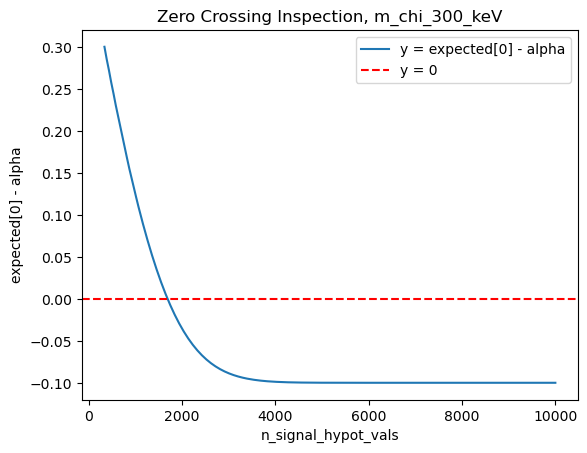

Zero Crossings: [1686.95015442]


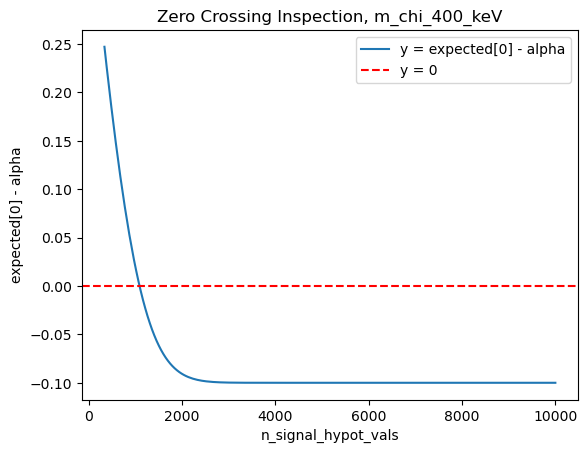

Zero Crossings: [1085.71193099]


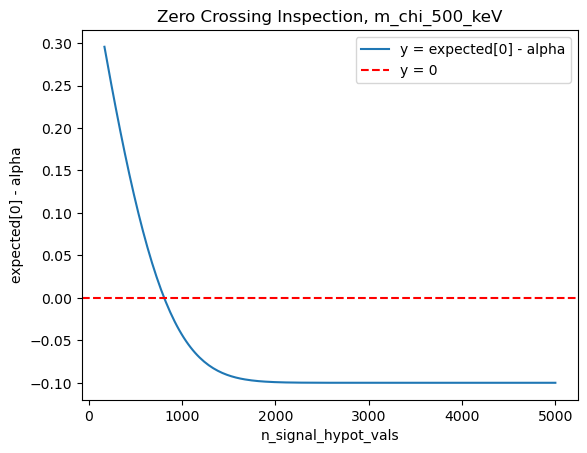

Zero Crossings: [806.88056113]


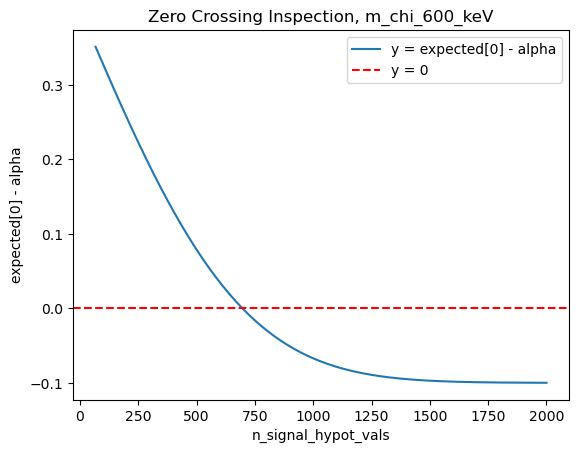

Zero Crossings: [696.43061294]


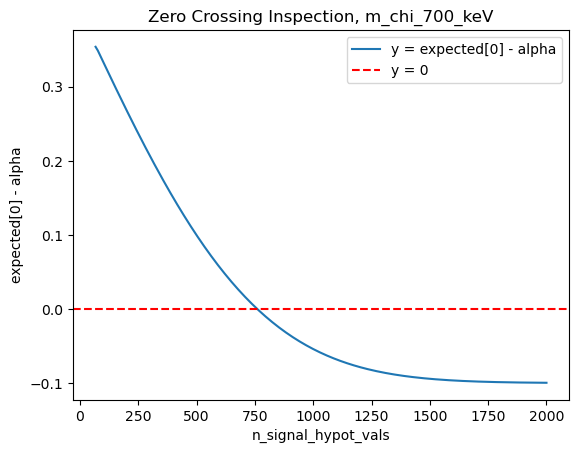

Zero Crossings: [759.64419776]


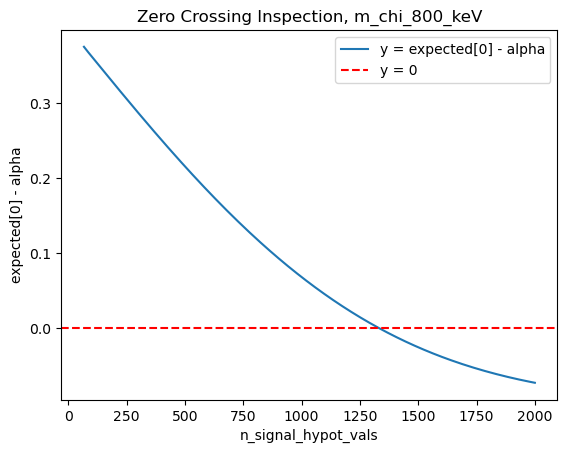

Zero Crossings: [1330.9826302]


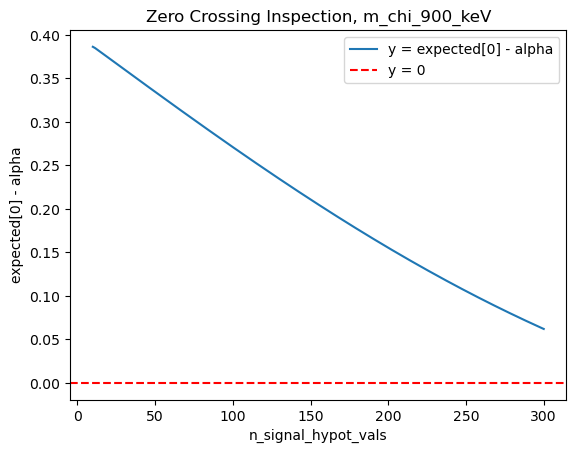

Zero Crossings: []


In [55]:
for idx, (lab, lab_fancy, fmass_keV, sig_dist, n_max) in enumerate(zip(labels, labels_fancy, light_fermion_masses_keV, def_signal_dist, n_max_list)):
    # First check that the endpoint is in the fit range
    if 2039 - 2 * fermion_mass_keV < min_bin:
        continue

    sig_dist_fitrange     = sig_dist[min_bin:max_bin + 1]
    sig_dist_fitrange_eff = np.sum(sig_dist_fitrange) # sig_distribution already normalized to 1
    signal_pdf            = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)
    
    model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

    n_signal.set_value(0)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    real_data = zfit.data    .BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))
    nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name = 'hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

    # https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
    n_signal_hypot_vals = np.linspace(n_max / 30., n_max, 200)
    poialt  = POI(n_signal, 0) # Background only
    poinull = POIarray(n_signal, n_signal_hypot_vals) # Background + signal

    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2])

    full_spec_cts      = n_signal_hypot_vals / sig_dist_fitrange_eff
    real_full_spec_cts = full_spec_cts / eff
    half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
    inv_half_life      = 1 / half_life

    
    plt.plot(n_signal_hypot_vals, expected[0] - alpha, label='y = expected[0] - alpha')
    plt.axhline(0, color='red', linestyle='--', label='y = 0')
    plt.xlabel('n_signal_hypot_vals')
    plt.ylabel('expected[0] - alpha')
    plt.title(f'Zero Crossing Inspection, {lab}')
    plt.legend()
    plt.show()
    
    zero_crossings = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)
    print("Zero Crossings:", zero_crossings)

Zero Crossings: [2550.36107441]
Zero Crossings: [1784.41075518]
Zero Crossings: [1178.74914845]
Zero Crossings: [809.27415174]
Zero Crossings: [578.42612716]
Zero Crossings: [412.86862839]
Zero Crossings: [258.68029822]
Zero Crossings: [115.30015603]
Zero Crossings: [30.38199805]


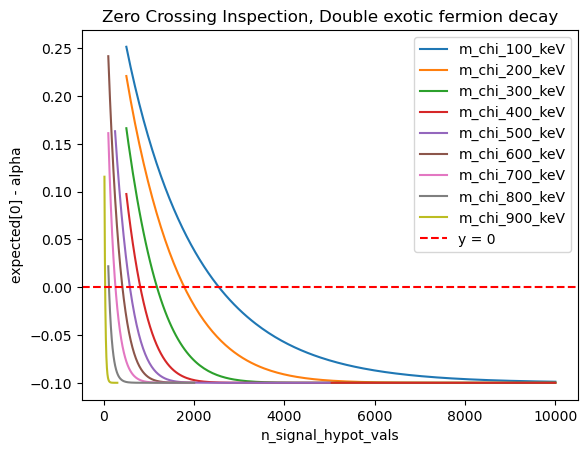

In [39]:
for idx, (lab, lab_fancy, fmass_keV, sig_dist, n_max) in enumerate(zip(labels, labels_fancy, light_fermion_masses_keV, def_signal_dist, n_max_list)):
    # First check that the endpoint is in the fit range
    if 2039 - 2 * fermion_mass_keV < min_bin:
        continue

    sig_dist_fitrange     = sig_dist[min_bin:max_bin + 1]
    sig_dist_fitrange_eff = np.sum(sig_dist_fitrange) # sig_distribution already normalized to 1
    signal_pdf            = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=sig_dist_fitrange), extended=n_signal)
    
    model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

    n_signal.set_value(0)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    real_data = zfit.data    .BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))
    nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
    minimizer = zfit.minimize.Minuit(verbosity=0)

    n_signal.set_value(1)
    n_bckg  .set_value(Nbckg)
    n_vvBB  .set_value(NvvBB)

    result = minimizer.minimize(nll)
    result.hesse(name = 'hesse_np')

    calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

    # https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
    n_signal_hypot_vals = np.linspace(n_max / 20., n_max, 200)
    poialt  = POI(n_signal, 0) # Background only
    poinull = POIarray(n_signal, n_signal_hypot_vals) # Background + signal

    expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2])

    full_spec_cts      = n_signal_hypot_vals / sig_dist_fitrange_eff
    real_full_spec_cts = full_spec_cts / eff
    half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
    inv_half_life      = 1 / half_life

    plt.plot(n_signal_hypot_vals, expected[0] - alpha, label=f'{lab}')
    
    zero_crossings = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)
    print("Zero Crossings:", zero_crossings)

plt.axhline(0, color='red', linestyle='--', label='y = 0')
plt.xlabel('n_signal_hypot_vals')
plt.ylabel('expected[0] - alpha')
plt.title(f'Zero Crossing Inspection, Double exotic fermion decay')
plt.legend()
plt.show()

In [40]:
import sys

sys.path.append('/Users/romoluque_c/LEGEND/2nbb_distortions/Spectral_Effects_Fitting_Lars/spectral_dist/')

from analytic_phase_space_factors import G0, keV


me  = 0.511 # in MeV
fm  = 1./197 # in keV^-1
pi  = math.pi
gA2 = math.pow(1.2724, 2) #gA from PDG
A   = 75.921
R   = 1.2 * math.pow(A, 1 / 3) * fm

def coupling(half_life, NME, PS):
    g2 = 1. / (half_life * PS) * 8 * math.pow(pi * R / me / NME, 2)
    return math.sqrt(g2)

coupling_min = []
coupling_max = []
M_0n_1       = gA2 * 2.66  # Reference? BSM whitepaper cites it 203-213 as variance in NME calculations
M_0n_2       = gA2 * 6.04  # Reference?

fitted_fermion_masses_keV = []

for model_label, model_label_fancy, fermion_mass_keV, half_life_sens in zip(labels, labels_fancy, light_fermion_masses_keV, all_half_life_sens):
    # Check if we skipped this fit due to fit bounds
    if half_life_sens is None:
        continue

    ps    = G0(fermion_mass_keV * keV, fermion_mass_keV * keV)
    g_min = coupling(half_life_sens, M_0n_2, ps)
    g_max = coupling(half_life_sens, M_0n_1, ps)

    fitted_fermion_masses_keV.append(fermion_mass_keV)
    coupling_min.append(g_min)
    coupling_max.append(g_max)

    print(('Model = {}, half-life = {} yr, Coupling_min = {}, Coupling_max={}'.format(model_label_fancy, half_life_sens, g_min, g_max)))

Model = m$_{\chi}$ = 100 keV, half-life = 1.2320454263618932e+23 yr, Coupling_min = 0.0006407702423385289, Coupling_max=0.0014549820540318479
Model = m$_{\chi}$ = 200 keV, half-life = 1.7608954038088085e+23 yr, Coupling_min = 0.0005979041924510721, Coupling_max=0.0013576471136858934
Model = m$_{\chi}$ = 300 keV, half-life = 2.66567377922295e+23 yr, Coupling_min = 0.0005797297599478254, Coupling_max=0.0013163788534153631
Model = m$_{\chi}$ = 400 keV, half-life = 3.882690050783705e+23 yr, Coupling_min = 0.0006142584368003867, Coupling_max=0.0013947823151407278
Model = m$_{\chi}$ = 500 keV, half-life = 5.432259280434311e+23 yr, Coupling_min = 0.0007187480255898159, Coupling_max=0.0016320443889332663
Model = m$_{\chi}$ = 600 keV, half-life = 7.610558132101847e+23 yr, Coupling_min = 0.0009283200083462996, Coupling_max=0.0021079146054179135
Model = m$_{\chi}$ = 700 keV, half-life = 1.214688833634627e+24 yr, Coupling_min = 0.0012918734280962492, Coupling_max=0.0029334268818426113
Model = m$_{

In [41]:
### Save computed data
# filename = './results/sensitivity_doubleF_LEGEND200_fit_0_2039.npz'
# np.savez(filename, masses=fitted_fermion_masses_keV, limits=[coupling_min, coupling_max])

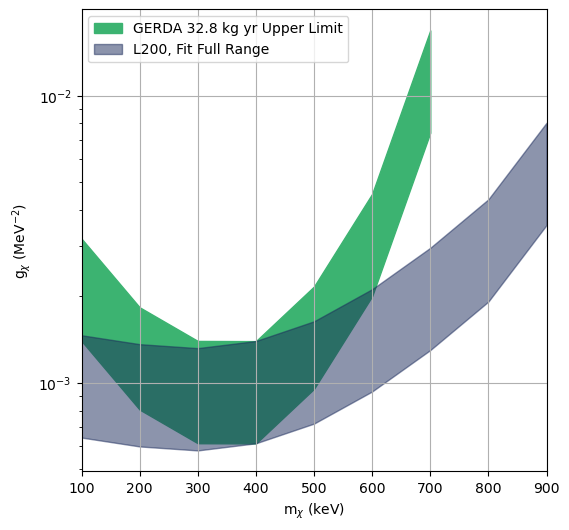

In [45]:
#GERDA 32.8 kg yr
data_doubleF_gerda   = np.load('/Users/romoluque_c/LEGEND/2nbb_distortions/Spectral_Effects_Fitting_Lars/spectral_dist/results/results_gerda2022_double-fermions_all.npz')
masses_doubleF_gerda = data_doubleF_gerda['masses']
limits_doubleF_gerda = data_doubleF_gerda['limits']

# LEGEND
filename            = './results/sensitivity_doubleF_LEGEND200_fit_0_2039.npz'
data_doubleF_full   = np.load(filename)
masses_doubleF_full = data_doubleF_full['masses']
limits_doubleF_full = data_doubleF_full['limits']

#plot
fig, ax = plt.subplots(figsize=(6,6))
ax.fill_between(masses_doubleF_gerda, limits_doubleF_gerda[0], limits_doubleF_gerda[1], label='GERDA 32.8 kg yr Upper Limit', color='mediumseagreen')
ax.fill_between(masses_doubleF_full,  limits_doubleF_full [0], limits_doubleF_full [1], label='L200, Fit Full Range',         color='#1A2A5B', alpha=0.5)
ax.set_yscale('log')
ax.set_xlim(100,900)
ax.set_xlabel(r'm$_\chi$ (keV)')
ax.set_ylabel(r'g$_\chi$ (MeV$^{-2}$)')
ax.legend(loc='upper left')
ax.grid()

plt.savefig('./images/LEGEND_200_sensitivity_exotic_fermions.pdf', bbox_inches='tight')

## RH currents

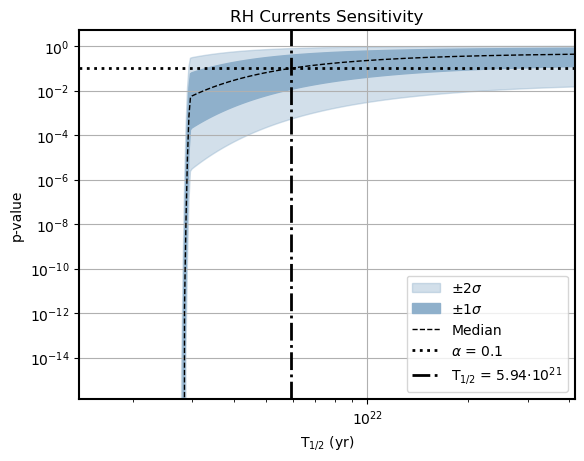

In [47]:
min_bin = 560
max_bin = 2010

# Input for fitting
signal_dist = rh_curr_dist
N_min       =   5000
N_max       = 150000

# ===========================================================================

# Cut the distribution in the fit range
limits  = (min_bin, max_bin + 1)
binning = max_bin + 1 - min_bin

bckg_model_fitrange = bckg_model[min_bin:max_bin + 1]
vvBB_model_fitrange = vvBB_model[min_bin:max_bin + 1]

# Calculate the number of background and 2vBB events
Nbckg = exposure * np.sum(bckg_model_fitrange)
NvvBB = exposure * np.sum(vvBB_model_fitrange)


# Setup zfit values
obs      = zfit.Space('E', limits=limits, binning=binning)
n_signal = zfit.Parameter('n_signal',   0, 0, step_size=0.01)
n_bckg   = zfit.Parameter('n_bckg', Nbckg, 0, step_size=0.01)
n_vvBB   = zfit.Parameter('n_2vBB', NvvBB, 0, step_size=0.01)

# Pdfs
bckg_model_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=bckg_model_fitrange), extended=n_bckg)
vvBB_pdf       = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=vvBB_model_fitrange), extended=n_vvBB)

signal_dist_fitrange = signal_dist[min_bin:max_bin + 1]
signal_fitrange_eff  = np.sum(signal_dist_fitrange) # sig_distribution already normalized to 1
signal_pdf           = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=signal_dist_fitrange), extended=n_signal)
# Model (signal + background)
# Since both signal_pdf and background_model_pdf are extended PDF's we should not specify the fraction of each PDF
model = zfit.pdf.BinnedSumPDF([signal_pdf, bckg_model_pdf, vvBB_pdf])

n_signal.set_value(0)
n_bckg  .set_value(Nbckg)
n_vvBB  .set_value(NvvBB)
real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))

# In theory the 'subtr_const': True should offset the loss function closer to 0. In practice the opposite is true.
# After perusing the source code (https://zfit.readthedocs.io/en/v0.18.1/_modules/zfit/core/loss.html)
# I see zfit is calculating `log_offset = (NLL - 10000) / nEventsTot` which is completely bogus for a binned fit
# zfit should be using `log_offset = NLL / binning` because binning is the amount of bins we are actually fitting
# In fact the loss function L is defined (https://zfit.readthedocs.io/en/stable/user_api/_generated/loss/zfit.loss.ExtendedBinnedNLL.html#extendedbinnednll)
# as a product over the bins, so NLL will be O(binning) and not O(nEventsTot). So the calculated log_offset is bogus - Lars, June 24, 2024
# nll = zfit.loss.ExtendedBinnedNLL(model, zfit.data.BinnedData.from_tensor(space=obs, values=model.counts()), options = {'subtr_const' : False})
nll       = zfit.loss.ExtendedBinnedNLL(model, real_data, options={'subtr_const' : False})
minimizer = zfit.minimize.Minuit(verbosity=0)

# Perturb n_signal away from 0 to get out of a local minimum at 0
# Even when n_signal for the fake_data != 0 the fitting gets stuck there for some reason
# This only happens sometimes, and more often when I don't bound n_signal, n_background > 0
n_signal.set_value(1)
n_bckg  .set_value(Nbckg)
n_vvBB  .set_value(NvvBB)

result = minimizer.minimize(nll)
result.hesse(name = 'hesse_np')

calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

# https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
n_signal_hypot_vals = np.linspace(N_min, N_max, 200)

poialt   = POI(n_signal, 0) # Background only
poinull  = POIarray(n_signal, n_signal_hypot_vals) # Background + signal
expected = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2])

full_spec_cts      = n_signal_hypot_vals / signal_fitrange_eff
real_full_spec_cts = full_spec_cts / eff
half_life          = (NA / mA) * (math.log(2) / real_full_spec_cts) * exposure
inv_half_life      = 1 / half_life

# Calculate sensitivity
n_signal_sens           = find_zero_crossing(n_signal_hypot_vals, expected[0] - alpha)[0]
n_signal_full_spec_sens = n_signal_sens / signal_fitrange_eff
real_full_spec_sens     = n_signal_full_spec_sens / eff
half_life_sens          = (NA / mA) * (math.log(2) / real_full_spec_sens) * exposure
inv_half_life_sens      = 1 / half_life_sens

fig, ax = plt.subplots()
ax.fill_between(half_life, expected[3], expected[4], color='#8FB0CB', label=r'$\pm 2\sigma$', alpha=0.4)
ax.fill_between(half_life, expected[1], expected[2], color='#8FB0CB', label=r'$\pm 1\sigma$')
ax.plot(half_life, expected[0], c='black', lw=1, ls='dashed', label='Median')
ax.axhline(alpha,          lw=2, ls='dotted',  color='black', label=r'$\alpha$ = ' + str(alpha))
ax.axvline(half_life_sens, lw=2, ls='dashdot', color='black', label='T$_{1/2}$ = ' + sci_notation(half_life_sens, precision=2, decimal_digits=2))
set_border_line_width(ax, 1.5)
ax.set_title('RH Currents Sensitivity')
ax.set_xlabel(r'T$_{1/2}$ (yr)')
ax.set_ylabel('p-value')
ax.set_xlim(min(half_life), max(half_life))
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc = 'lower right')
ax.grid()
fig.savefig('./images/rh_curr.pdf', bbox_inches = 'tight')
plt.show()

## Lorentz violation

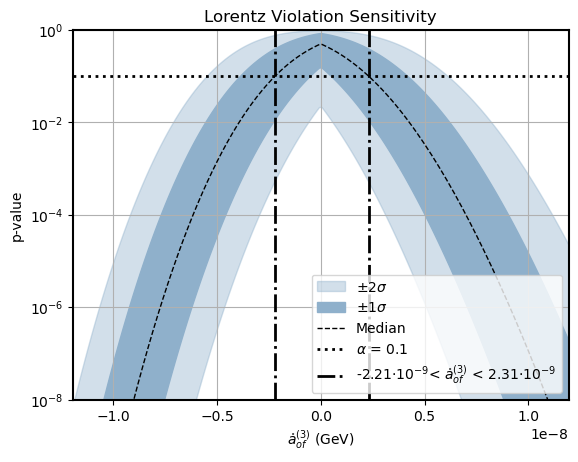

In [48]:
# Read in spectra
lv_dist = np.loadtxt(basepath + 'dist/lorentz/LV_76Ge_spectra.dat', usecols=(2), unpack=True)
lv_dist = np.insert(lv_dist, 0, 0, axis=0)
lv_dist_phasesp_int = np.sum(lv_dist) * 402.701 # Data file tells us to multiply by 402.701 to get G in units of 10^-21 y^-1 MeV^-1.
lv_dist = lv_dist / np.sum(lv_dist) # Normalize to area = 1

min_bin = 200
max_bin = 1900

# Range of values to construct CI over
LV_ratio_min = -0.1
LV_ratio_max =  0.1

# ===========================================================================

# Cut the distribution in the fit range
limits              = (min_bin, max_bin + 1)
binning             = max_bin + 1 - min_bin
bckg_model_fitrange = bckg_model[min_bin:max_bin + 1]
vvBB_model_fitrange = vvBB_model[min_bin:max_bin + 1]
lv_dist_fitrange    = lv_dist   [min_bin:max_bin + 1]

# Calculate the number of background and 2vBB events
Nbckg = exposure * np.sum(bckg_model_fitrange)
NvvBB = exposure * np.sum(vvBB_model_fitrange)

# Setup zfit values
obs    = zfit.Space('E', limits=limits, binning=binning)
n_vvBB = zfit.Parameter('n_2vBB', NvvBB, 0, step_size=0.01)
n_bckg = zfit.Parameter('n_bckg', Nbckg, 0, step_size=0.01)

def product(a, b):
    return a * b

LV_ratio = zfit.Parameter('LV_ratio', 0, lower = 1.5 * LV_ratio_min, upper = 1.5 * LV_ratio_max, step_size=0.01)
n_LV     = zfit.ComposedParameter('n_LV', product, params=[LV_ratio, n_vvBB])

vvBB_pdf       = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=vvBB_model_fitrange), extended=n_vvBB)
lv_pdf         = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=lv_dist_fitrange), extended=n_LV)
bckg_model_pdf = zfit.pdf.HistogramPDF(zfit.data.BinnedData.from_tensor(space=obs, values=bckg_model_fitrange), extended=n_bckg)

model = zfit.pdf.BinnedSumPDF([lv_pdf, vvBB_pdf, bckg_model_pdf])

# 0 means "no perturbation"
LV_ratio.set_value(0)
n_vvBB  .set_value(NvvBB)
n_bckg  .set_value(Nbckg)

real_data = zfit.data.BinnedData.from_tensor(space=obs, values=(exposure * L200_actual_data[min_bin: max_bin + 1]))

# In theory the 'subtr_const': True should offset the loss function closer to 0. In practice the opposite is true.
# After perusing the source code (https://zfit.readthedocs.io/en/v0.18.1/_modules/zfit/core/loss.html)
# I see zfit is calculating `log_offset = (NLL - 10000) / nEventsTot` which is completely bogus for a binned fit
# zfit should be using `log_offset = NLL / binning` because binning is the amount of bins we are actually fitting
# In fact the loss function L is defined (https://zfit.readthedocs.io/en/stable/user_api/_generated/loss/zfit.loss.ExtendedBinnedNLL.html#extendedbinnednll)
# as a product over the bins, so NLL will be O(binning) and not O(nEventsTot). So the calculated log_offset is bogus - Lars, June 24, 2024
# nll = zfit.loss.ExtendedBinnedNLL(model, zfit.data.BinnedData.from_tensor(space=obs, values=model.counts()), options = {'subtr_const' : False})
nll       = zfit.loss    .ExtendedBinnedNLL(model, real_data, options = {'subtr_const' : False})
minimizer = zfit.minimize.Minuit(verbosity=0)

# Perturb n_signal away from 0 to get out of a local minimum at 0
# Even when n_signal for the fake_data != 0 the fitting gets stuck there for some reason
# This only happens sometimes, and more often when I don't bound n_signal, n_background > 0
LV_ratio.set_value(LV_ratio_min/10)
n_vvBB  .set_value(NvvBB)
n_bckg  .set_value(Nbckg)

result = minimizer.minimize(nll)
result.hesse(name = 'hesse_np')

calculator = AsymptoticCalculator(input=result, minimizer=minimizer)

# https://hepstats.readthedocs.io/en/v0.6.1/getting_started/hypotests.html - Lars
LV_ratio_hypot_vals = np.linspace(LV_ratio_min, LV_ratio_max, 200)
poialt  = POI(LV_ratio, 0) # Background only
poinull = POIarray(LV_ratio, LV_ratio_hypot_vals) # Background + signal

# oneSided=True gives correct p-values from hepstats
# onesidedDiscovery will work when poialt > poinull
# onesided will work when poinull > poialt
# Get both results and combine into full p-value plot
expectedLeft  = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2], onesided=True, onesideddiscovery=True)
expectedRight = calculator.expected_pvalue(poinull, poialt, nsigma=[0, -1, 1, -2, 2], onesided=True, onesideddiscovery=False)

# Where default (incorrect) output is given, use the correct results expected p-value array
expected = np.where(expectedLeft[0] == 5e-1, expectedRight, expectedLeft)

# Data file tells us to multiply by 48.122 to get G in units of 10^-21 y^-1.
nnbb_ref_phasesp_int = np.sum(lv_dist) * 48.122 
# Calculate phase space ratio and convert to units of GeV
full_spec_phasesp_ratio_MeV = nnbb_ref_phasesp_int / lv_dist_phasesp_int
full_spec_phasesp_ratio_GeV = full_spec_phasesp_ratio_MeV * 1e-3

aof = LV_ratio_hypot_vals * full_spec_phasesp_ratio_GeV
# Calculate sensitivity
aof_sens       = find_zero_crossing(aof, expected[0] - alpha)
aof_sens_left  = aof_sens[0]
aof_sens_right = aof_sens[1]

sens_label = sci_notation(aof_sens_left, precision=2, decimal_digits=2) + r'< $\mathring{a}_{of}^{(3)}$ < ' + sci_notation(aof_sens_right, precision=2, decimal_digits=2)

fig, ax = plt.subplots()
ax.fill_between(aof, expected[3], expected[4], color='#8FB0CB', label=r'$\pm 2\sigma$', alpha=0.4)
ax.fill_between(aof, expected[1], expected[2], color='#8FB0CB', label=r'$\pm 1\sigma$')
ax.plot(aof, expected[0], c='black', lw=1, ls='dashed', label='Median')
ax.axhline(alpha,          lw=2, ls='dotted',  color='black', label=r'$\alpha$ = ' + str(alpha))
ax.axvline(aof_sens_left,  lw=2, ls='dashdot', color='black', label=sens_label)
ax.axvline(aof_sens_right, lw=2, ls='dashdot', color='black')
set_border_line_width(ax, 1.5)
ax.set_title('Lorentz Violation Sensitivity')
ax.set_xlabel(r'$\mathring{a}_{of}^{(3)}$ (GeV)')
ax.set_ylabel('p-value')
ax.set_xlim(min(aof), max(aof))
ax.set_ylim(1e-8, 1)
ax.set_yscale('log')
ax.legend(loc='lower right')
fig.savefig('./images/lorentz_violation_aof.pdf', bbox_inches='tight')
ax.grid()
plt.show()

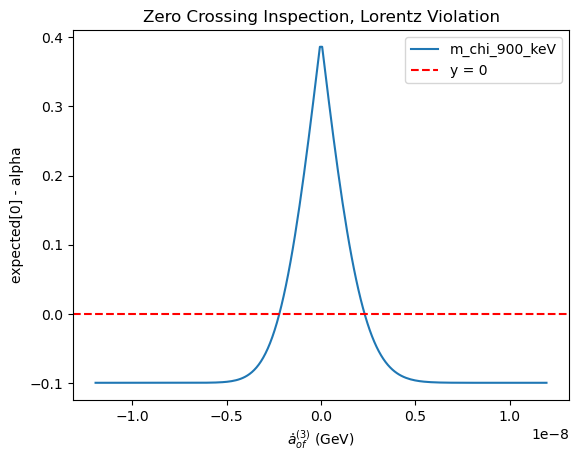

In [49]:
plt.plot(aof, expected[0] - alpha, label=f'{lab}')
plt.axhline(0, color='red', linestyle='--', label='y = 0')
plt.xlabel(r'$\mathring{a}_{of}^{(3)}$ (GeV)')
plt.ylabel('expected[0] - alpha')
plt.title(f'Zero Crossing Inspection, Lorentz Violation')
plt.legend()
plt.show()